In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
def stats(column, df, profondeur = None):
    # Calculate statistics
    column_data = df[column]
    column_stats = {
        'col': column,
        'min': column_data.min(),
        'max': column_data.max(),
        'median': column_data.median(),
        'Q1': column_data.quantile(0.25),
        'Q3': column_data.quantile(0.75),
        'mean': column_data.mean(),
        'std_deviation': column_data.std(),
        'cv': (column_data.std() / column_data.mean()) * 100,
        'skewness': column_data.skew(),
        'kurtosis': column_data.kurtosis()
    }

    return column_stats


In [8]:
def all_stats(df):

  for column in df.columns:
      print(stats(column, df))


In [19]:
df = pd.read_csv("fire_points_with_raster_values_prec.csv")
df = df.drop(columns = ["x","y"])


In [20]:
df.head()

wc2.1_cruts4.09_2.5m_prec_2020-01  wc2.1_cruts4.09_2.5m_prec_2020-02  \
0                                1.9                                2.9   
1                                3.3                                2.7   
2                                3.3                                2.7   
3                               94.4                               21.0   
4                               16.3                                0.6   

   wc2.1_cruts4.09_2.5m_prec_2020-03  wc2.1_cruts4.09_2.5m_prec_2020-04  \
0                                3.6                                2.0   
1                                5.4                                2.4   
2                                5.4                                2.4   
3                              150.3                              105.0   
4                               48.8                               46.7   

   wc2.1_cruts4.09_2.5m_prec_2020-05  wc2.1_cruts4.09_2.5m_prec_2020-06  \
0                                7.4                                1.0   
1                               10.8                                0.8   
2                               10.8                                0.8   
3                               17.0                               19.4   
4                               12.6                               11.3   

   wc2.1_cruts4.09_2.5m_prec_2020-07  wc2.1_cruts4.09_2.5m_prec_2020-08  \
0                                0.0                                0.0   
1                                0.0                                0.9   
2                                0.0                                0.9   
3                                6.7                                3.7   
4                                6.0                                3.1   

   wc2.1_cruts4.09_2.5m_prec_2020-09  wc2.1_cruts4.09_2.5m_prec_2020-10  ...  \
0                                1.0                                0.9  ...   
1                                0.9                                1.4  ...   
2                                0.9                                1.4  ...   
3                               53.9                               56.3  ...   
4                               26.1                               15.1  ...   

   wc2.1_cruts4.09_2.5m_prec_2024-03  wc2.1_cruts4.09_2.5m_prec_2024-04  \
0                                3.6                                2.1   
1                                4.2                                3.2   
2                                4.2                                3.2   
3                               31.8                               47.8   
4                               13.9                               15.9   

   wc2.1_cruts4.09_2.5m_prec_2024-05  wc2.1_cruts4.09_2.5m_prec_2024-06  \
0                                3.5                                1.0   
1                                6.1                                0.8   
2                                6.1                                0.8   
3                               30.5                                7.8   
4                               14.9                                7.8   

   wc2.1_cruts4.09_2.5m_prec_2024-07  wc2.1_cruts4.09_2.5m_prec_2024-08  \
0                                0.0                                0.0   
1                                0.0                                0.9   
2                                0.0                                0.9   
3                                0.7                                7.7   
4                                1.3                                6.5   

   wc2.1_cruts4.09_2.5m_prec_2024-09  wc2.1_cruts4.09_2.5m_prec_2024-10  \
0                                1.0                                0.9   
1                                1.4                                1.6   
2                                1.4                                1.6   
3                               52.3                             

In [21]:
all_stats(df)

{'col': 'wc2.1_cruts4.09_2.5m_prec_2020-01', 'min': np.float64(0.0), 'max': np.float64(133.6), 'median': np.float64(3.5), 'Q1': np.float64(2.6), 'Q3': np.float64(4.5), 'mean': np.float64(10.09615162998914), 'std_deviation': np.float64(17.873418300938724), 'cv': np.float64(177.03199155456767), 'skewness': np.float64(2.8041052630542262), 'kurtosis': np.float64(7.589305541069099)}
{'col': 'wc2.1_cruts4.09_2.5m_prec_2020-02', 'min': np.float64(0.0), 'max': np.float64(80.8), 'median': np.float64(1.6), 'Q1': np.float64(1.0), 'Q3': np.float64(2.8), 'mean': np.float64(3.1523391618465078), 'std_deviation': np.float64(6.010117369032815), 'cv': np.float64(190.65579750347487), 'skewness': np.float64(4.624357114377062), 'kurtosis': np.float64(23.55899645658456)}
{'col': 'wc2.1_cruts4.09_2.5m_prec_2020-03', 'min': np.float64(0.0), 'max': np.float64(253.5), 'median': np.float64(4.6), 'Q1': np.float64(3.8), 'Q3': np.float64(7.1), 'mean': np.float64(15.319683974913016), 'std_deviation': np.float64(30.4

In [22]:
def box_plot(column, df):
    plt.figure(figsize=(12, 6))

    
    sns.boxplot(x=column, data=df)
    plt.title('Box plot of ' + column)

    plt.xlabel(column)
    plt.show()

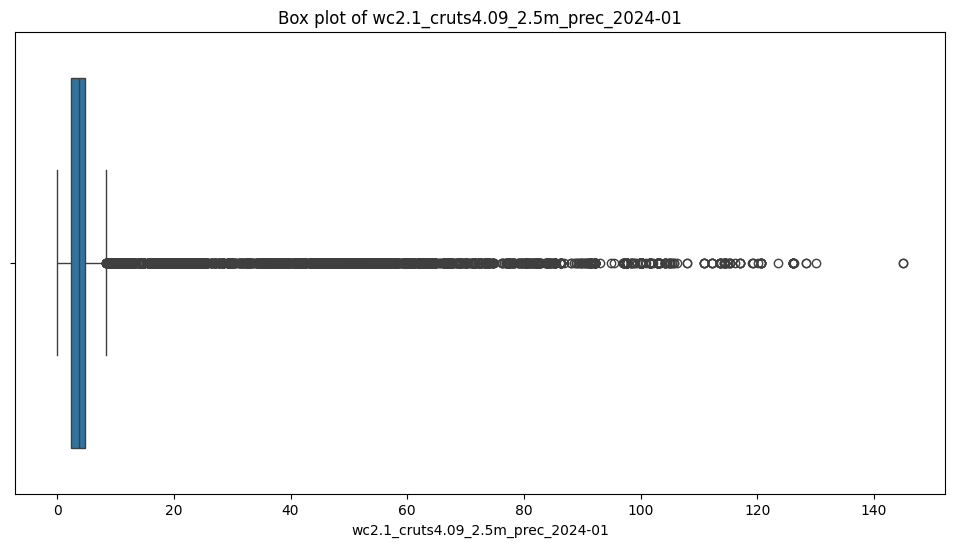

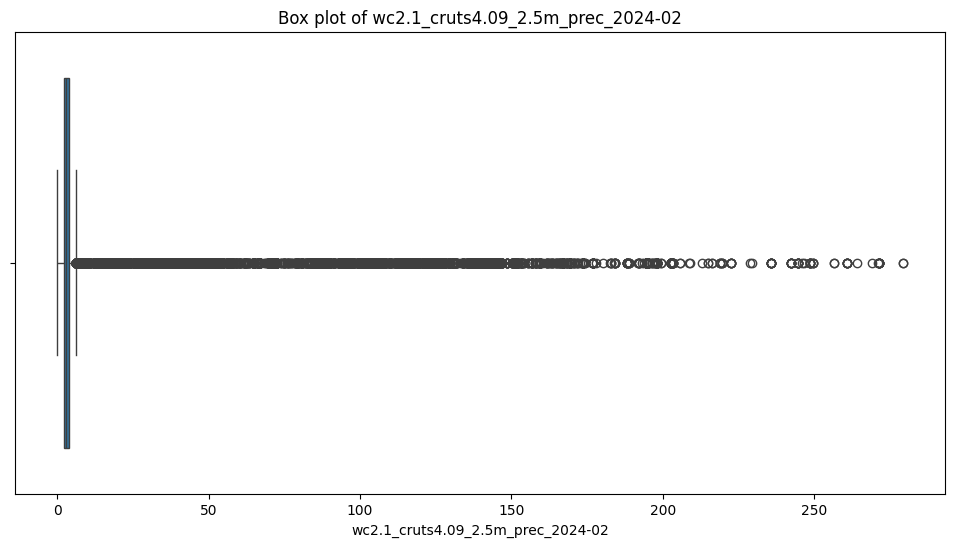

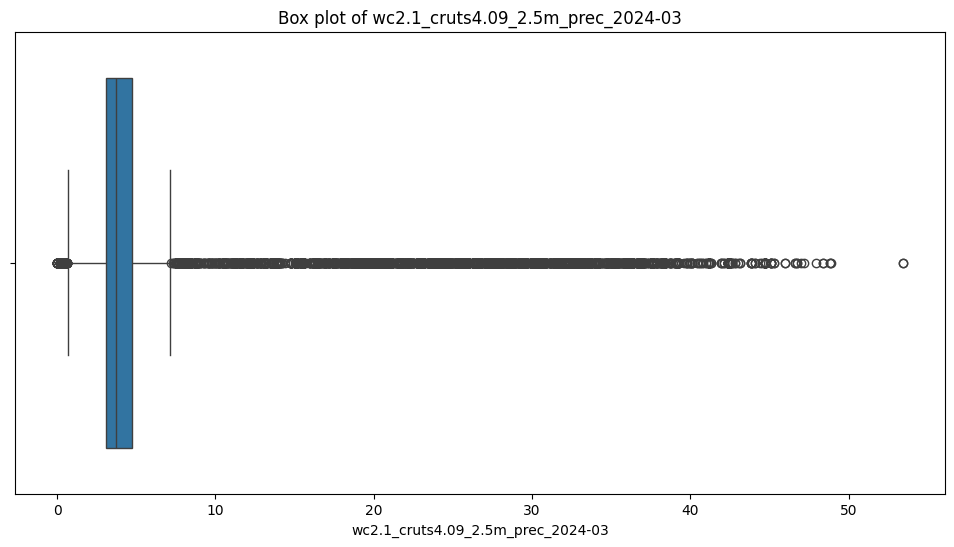

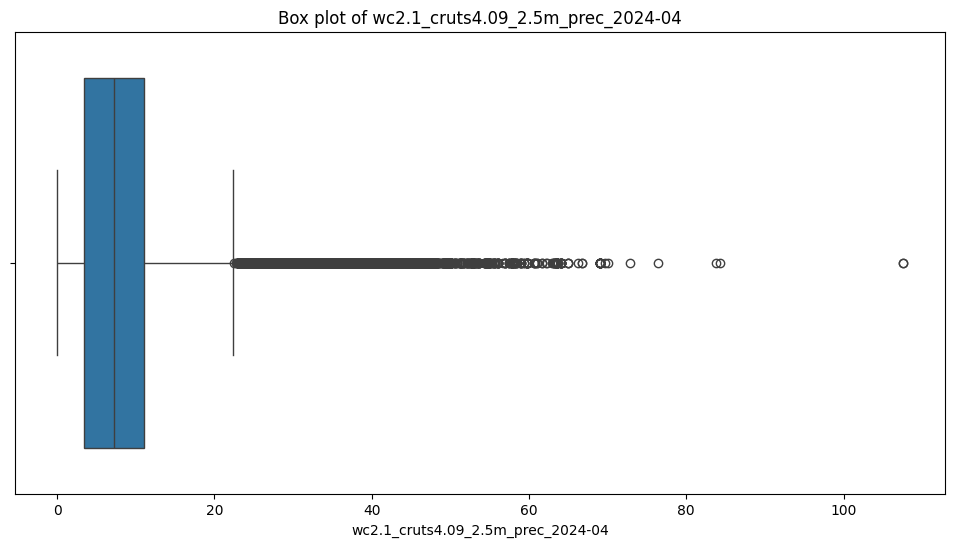

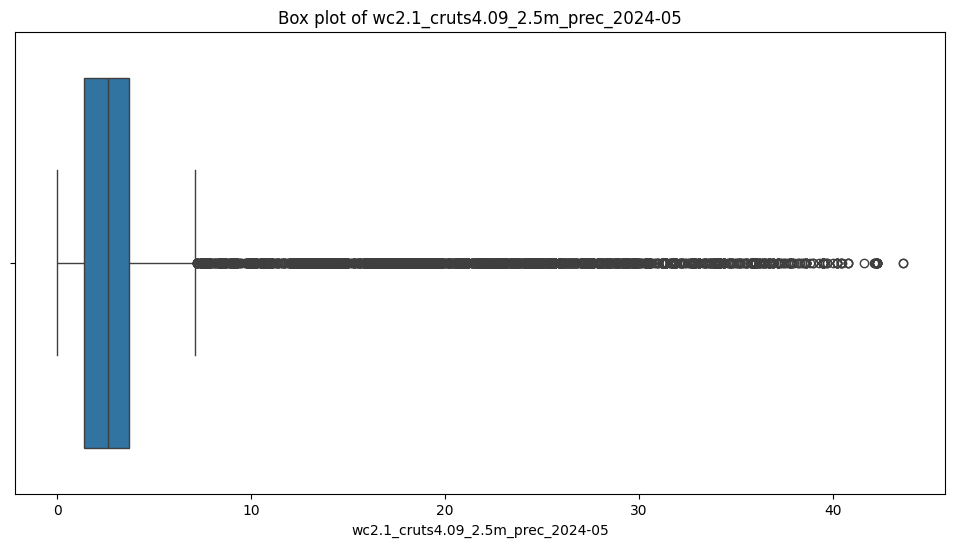

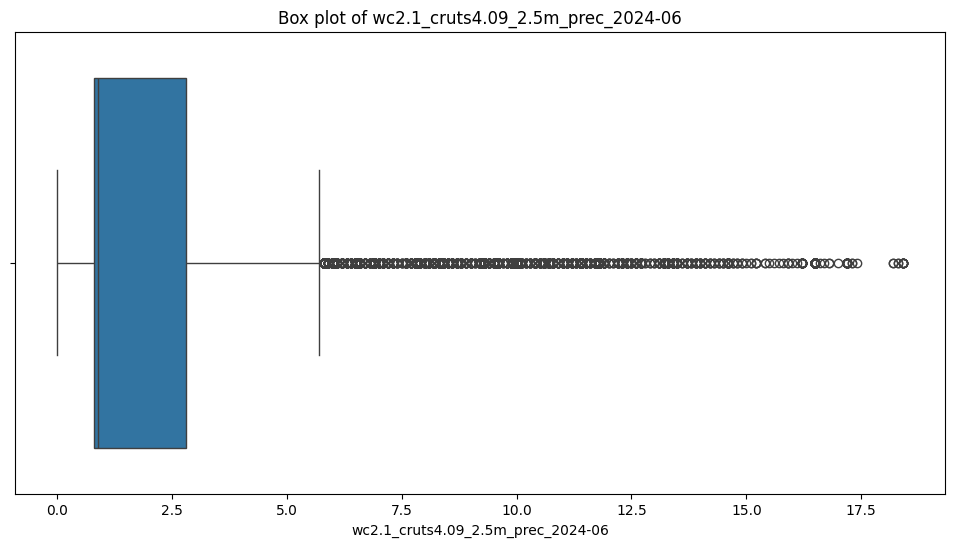

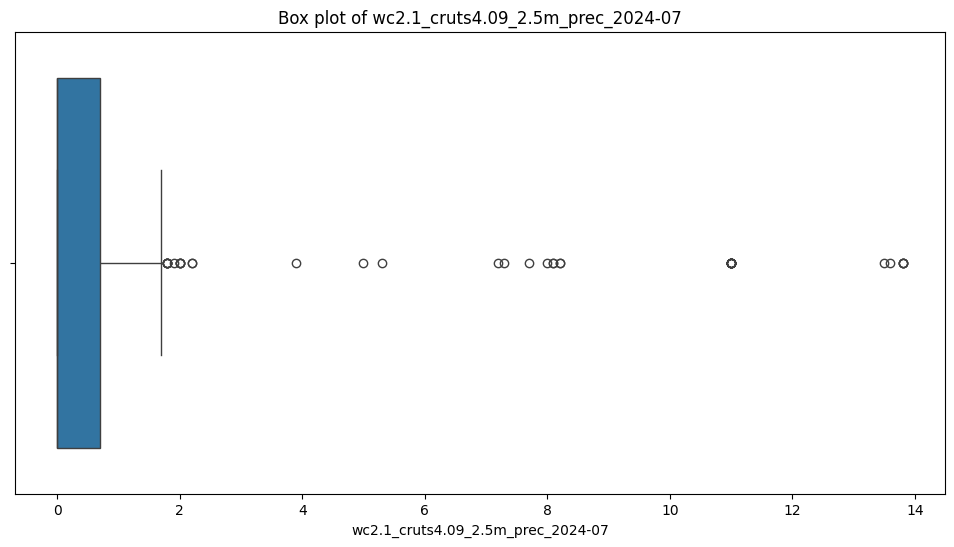

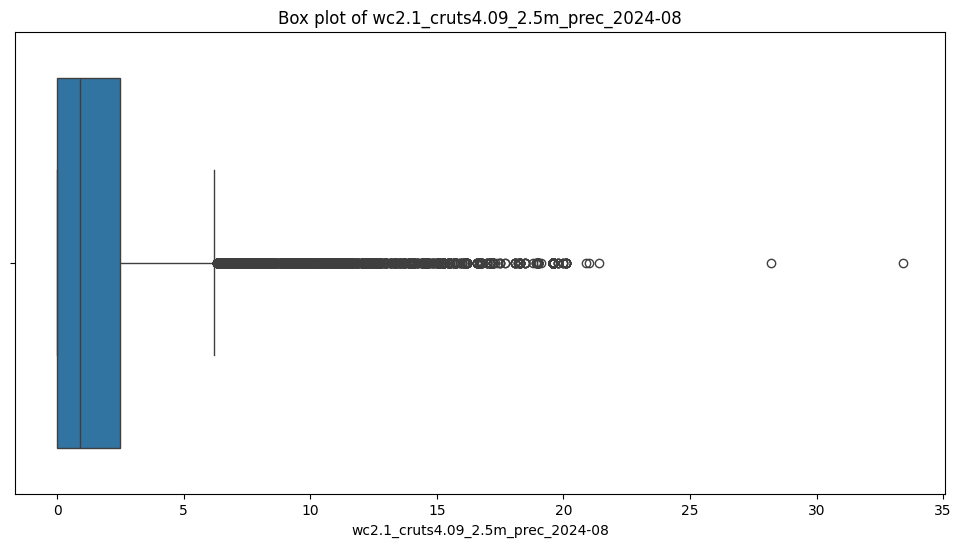

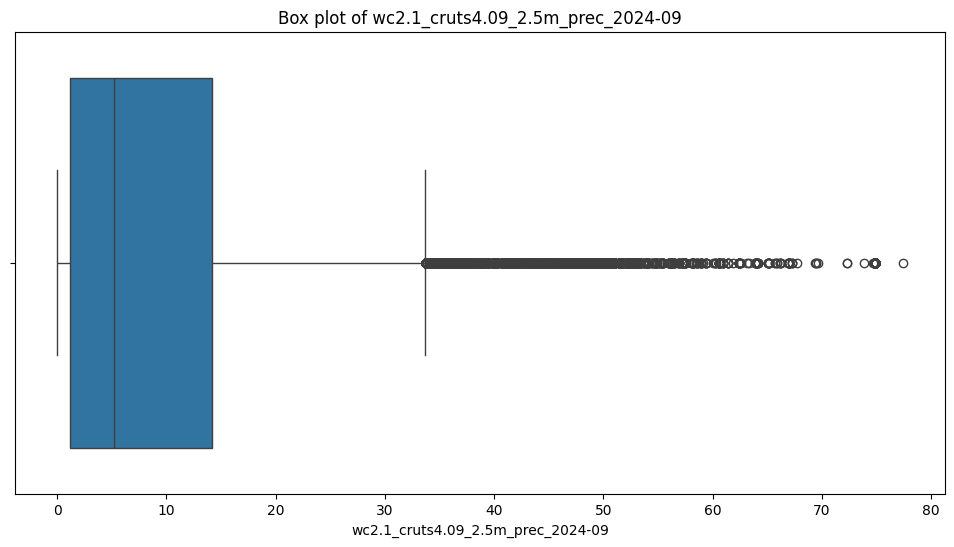

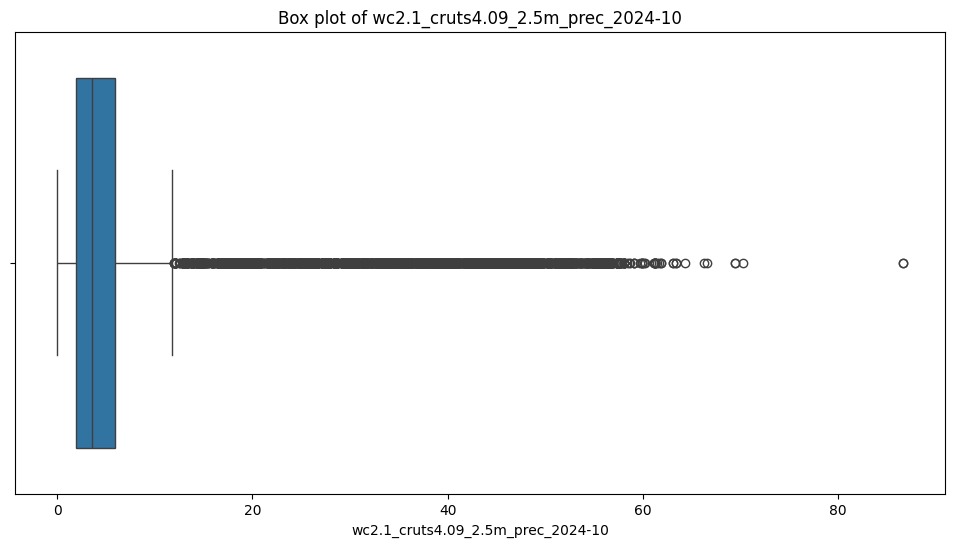

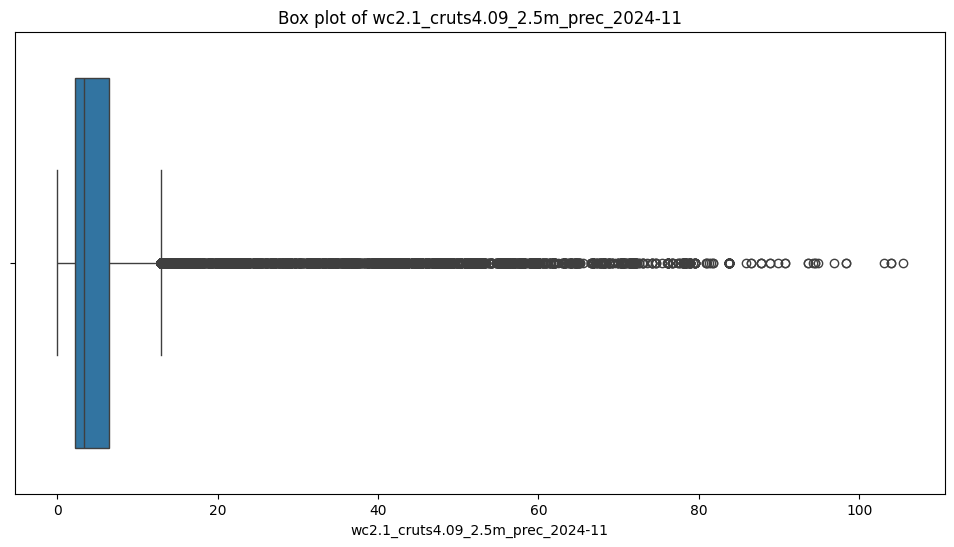

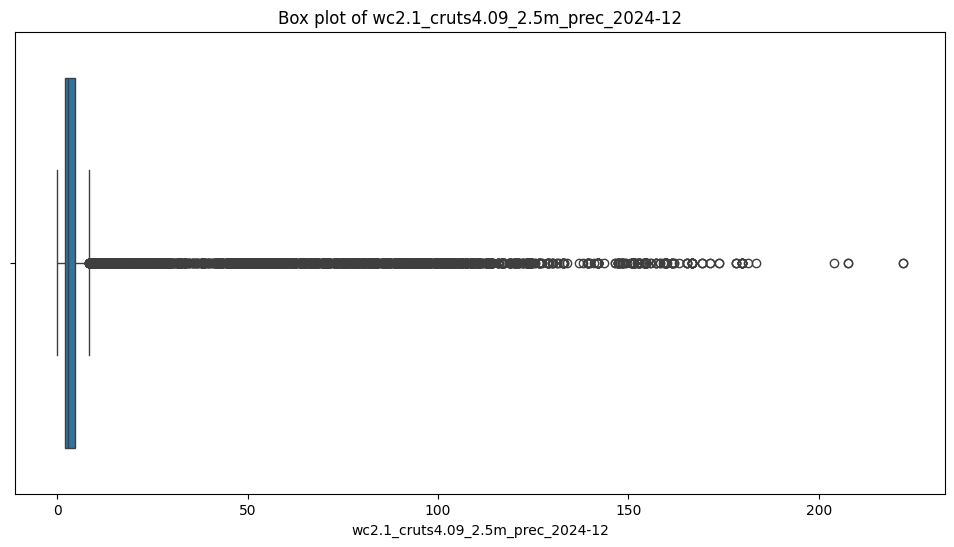

In [23]:
for column in df.columns:
  if "2024" in column:
    box_plot(column, df)

In [24]:
def histogram(column, df, ud_ld=None):
    plt.xlabel('Valeurs')
    plt.ylabel('Fréquence')

    
    filtered_data = df[column]
    plt.title('Distribution des Données ' + column)

    plt.hist(filtered_data, bins=50, edgecolor='black', alpha=1)
    plt.show()

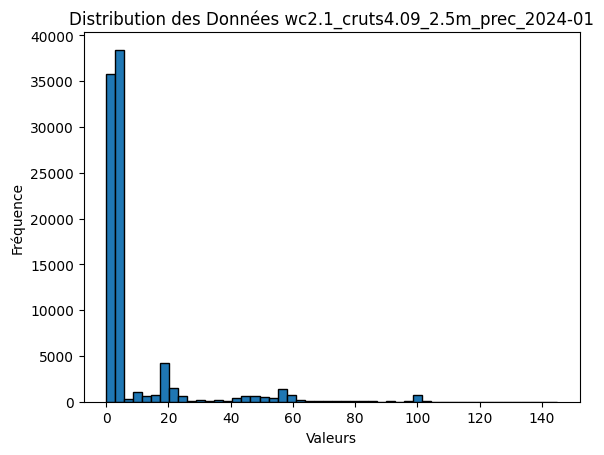

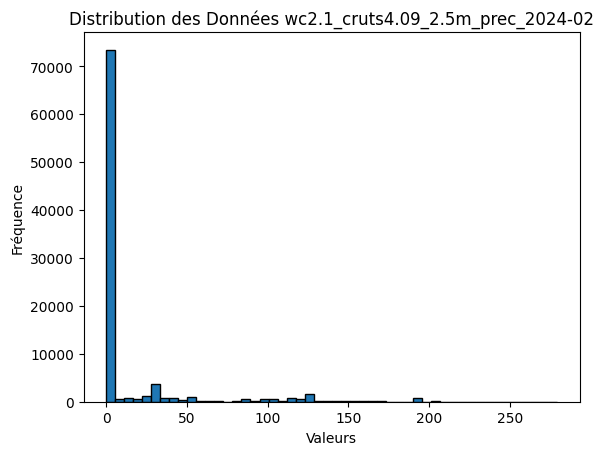

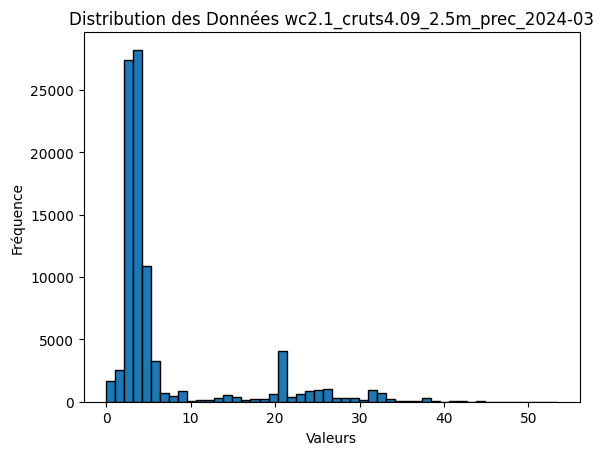

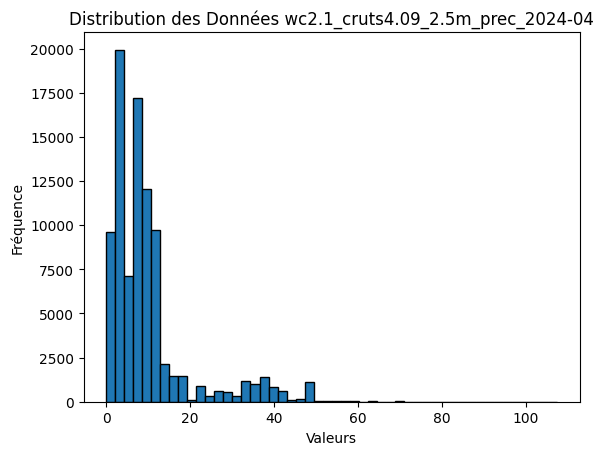

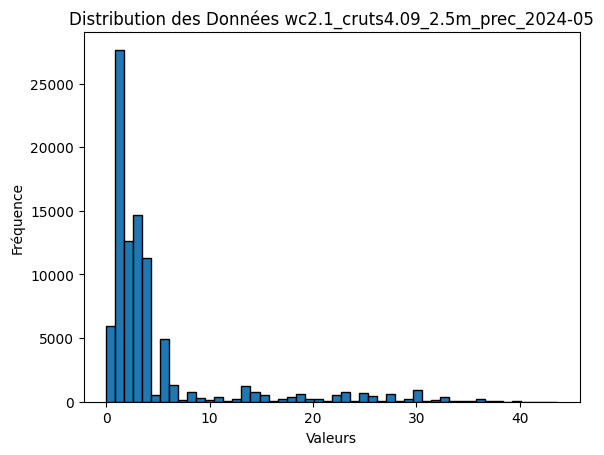

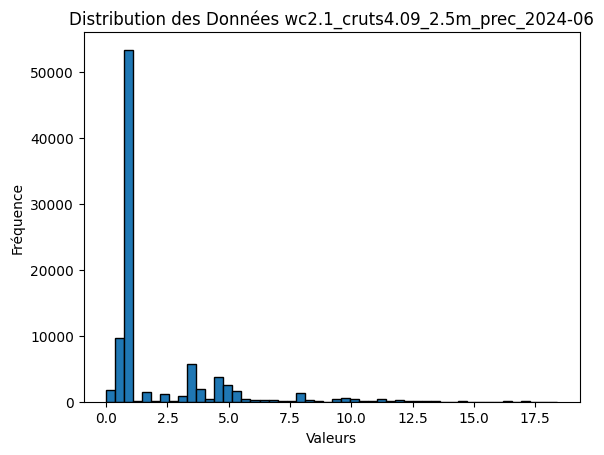

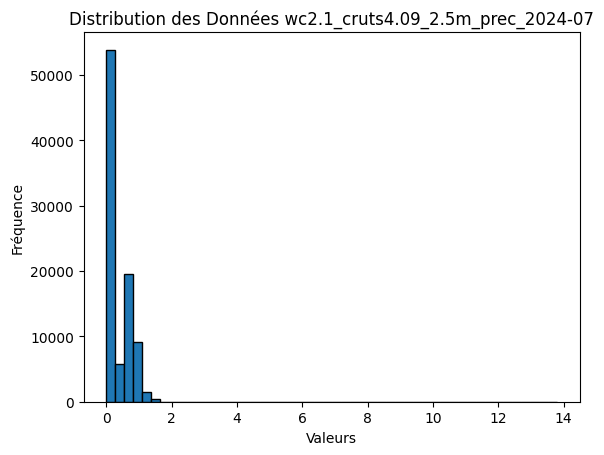

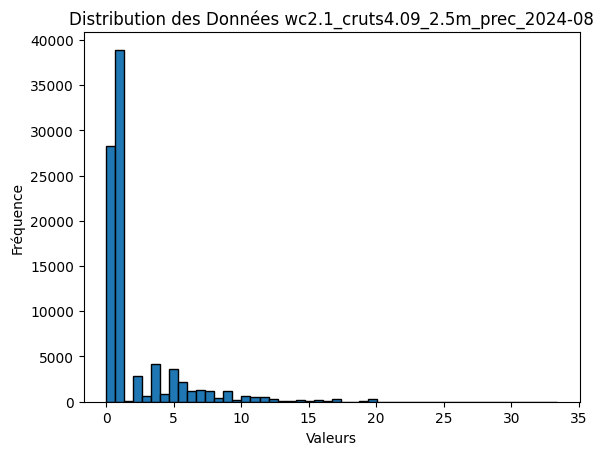

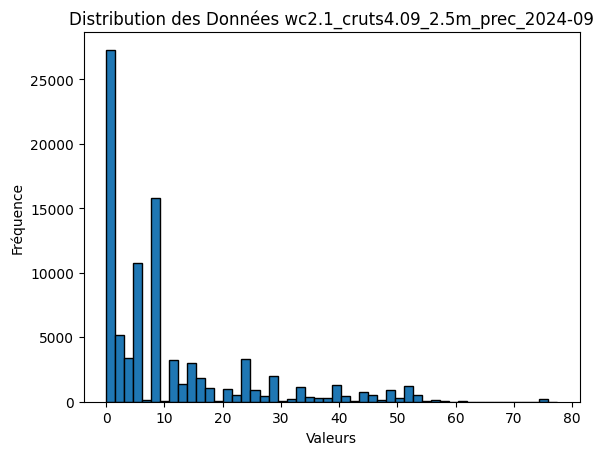

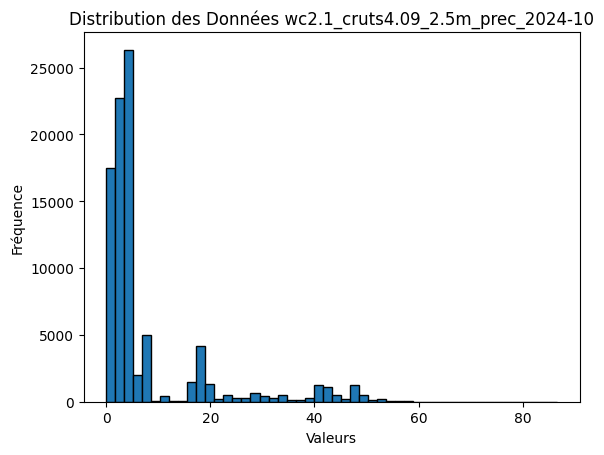

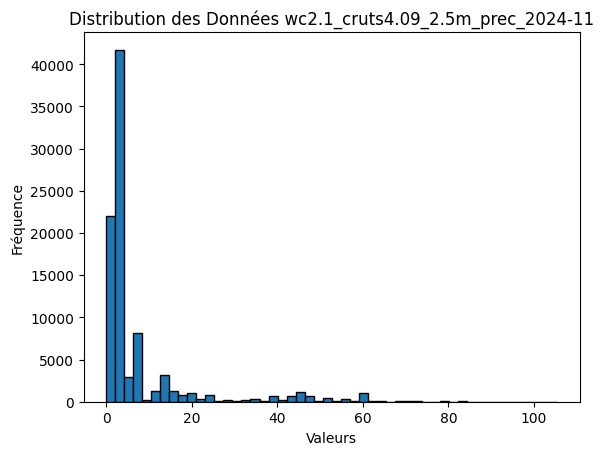

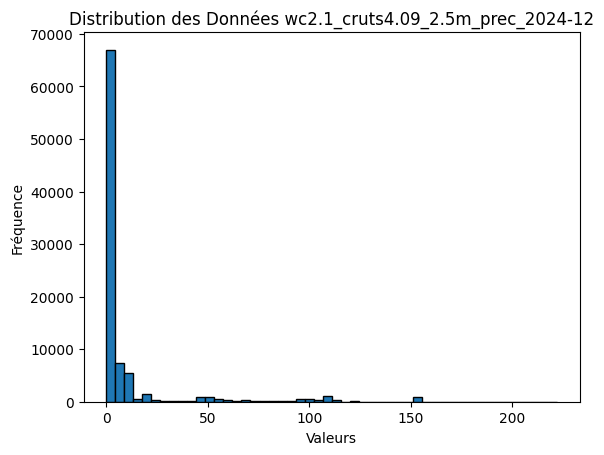

In [25]:
for column in df.columns:
  if "2024" in column:
    histogram(column, df)

In [26]:
def scatterplot(col1, col2, df, ud_ld=None):
    plt.figure(figsize=(8, 6))

    
    sns.scatterplot(x=col1, y=col2, data=df)
    plt.title(f'Scatterplot of {col1} vs {col2}')

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [29]:
def all_scatterplots(df, ud_ld=None):
    plotted_pairs = set()  # Track plotted pairs to avoid redundancy
    for col1 in df.columns:
        if "2024" in col1:
            for col2 in df.columns:
                if "2024" in col2:
                    if col1 != col2 and (col2, col1) not in plotted_pairs:
                        correlation = df[col1].corr(df[col2])
                        print(f'Correlation between {col1} and {col2}: {correlation}')
                        scatterplot(col1, col2, df, ud_ld=ud_ld)
                        plotted_pairs.add((col1, col2))

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-02: 0.9914894898081618


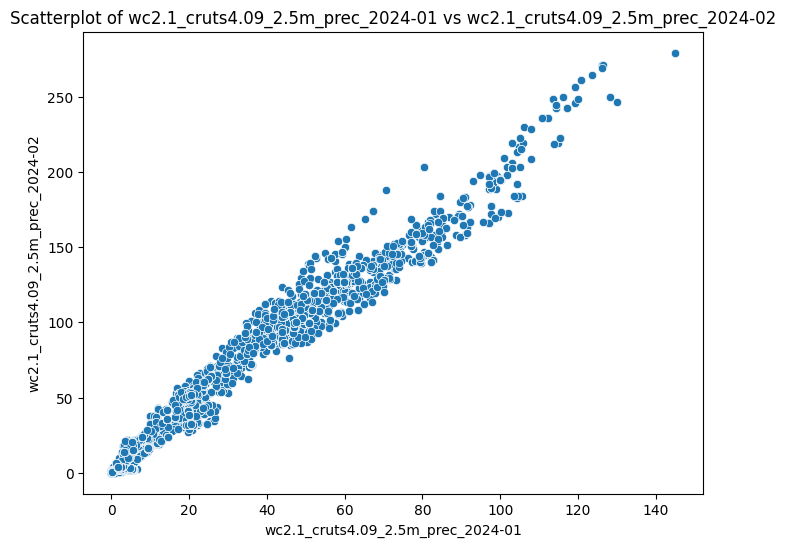

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-03: 0.8858959162803058


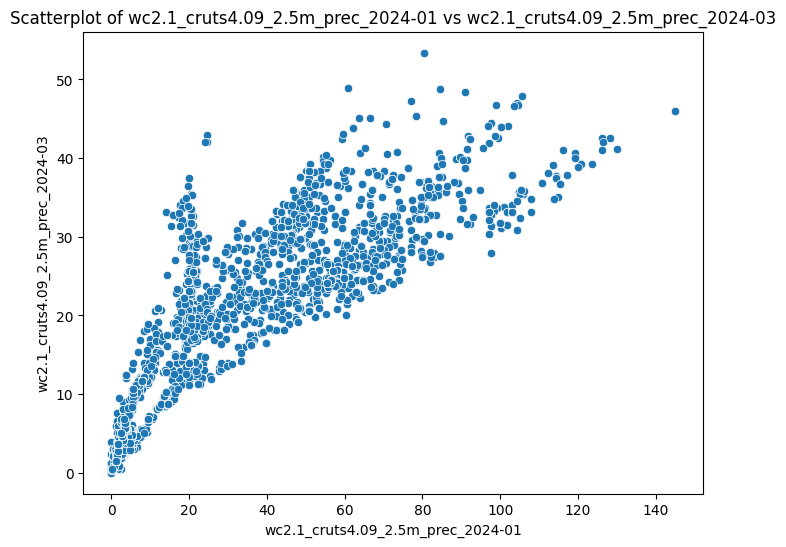

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-04: 0.8534707571880507


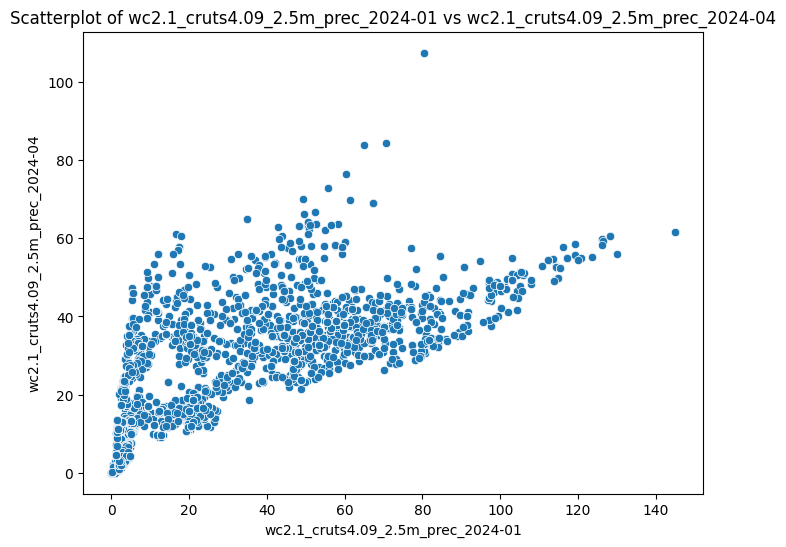

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-05: 0.8347820329668966


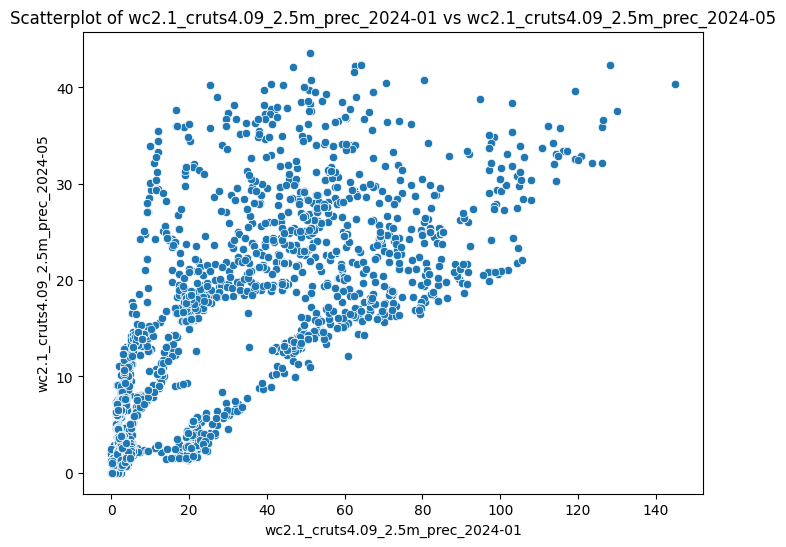

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-06: 0.6993239017734815


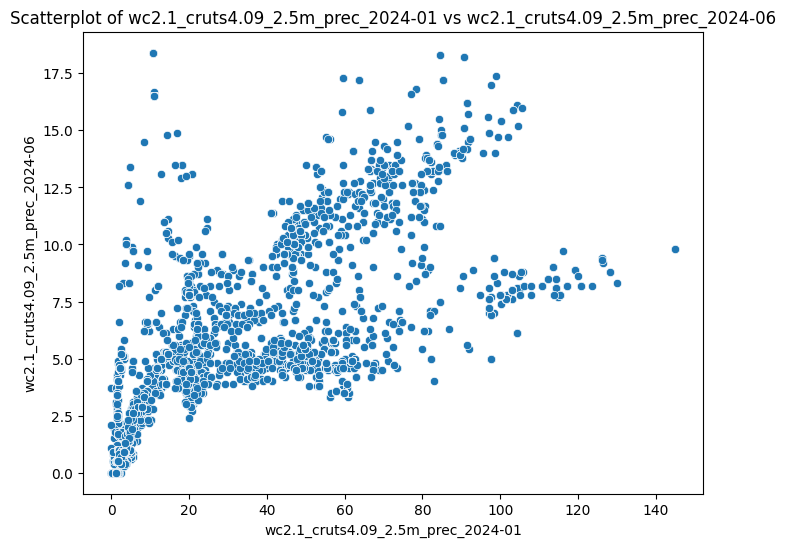

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-07: 0.35186135137888885


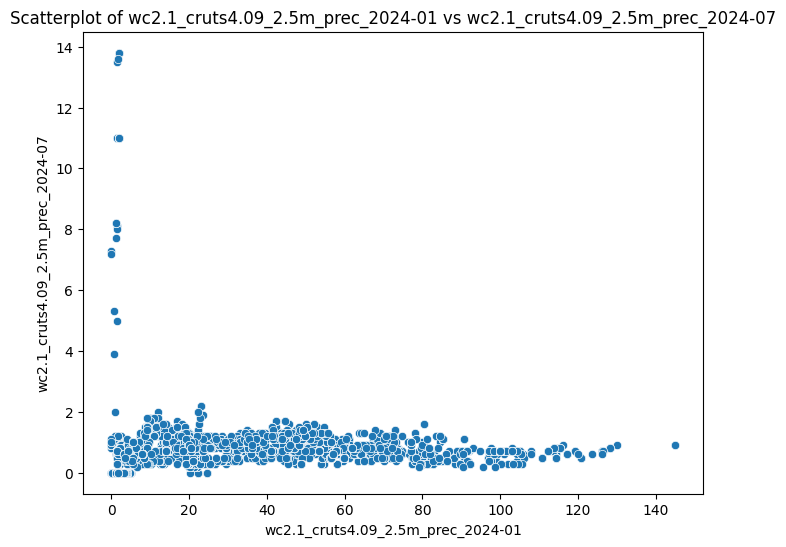

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-08: 0.6520731726523681


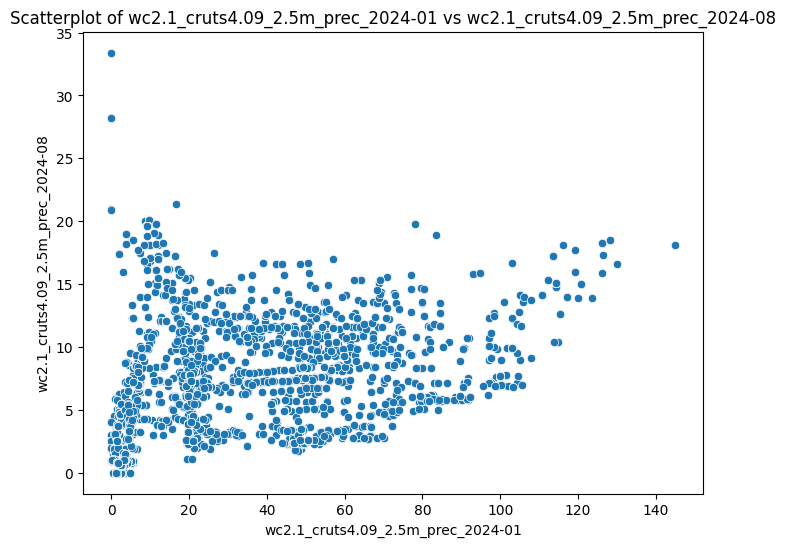

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-09: 0.713076184006619


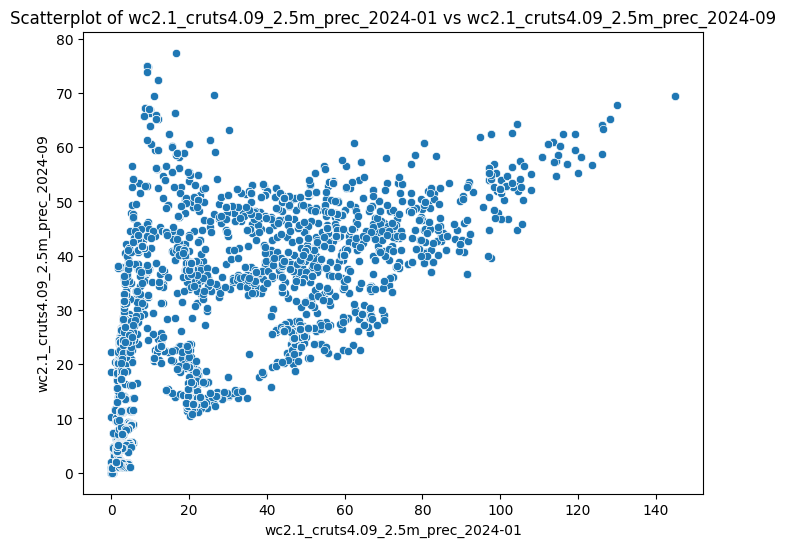

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-10: 0.8925500394724719


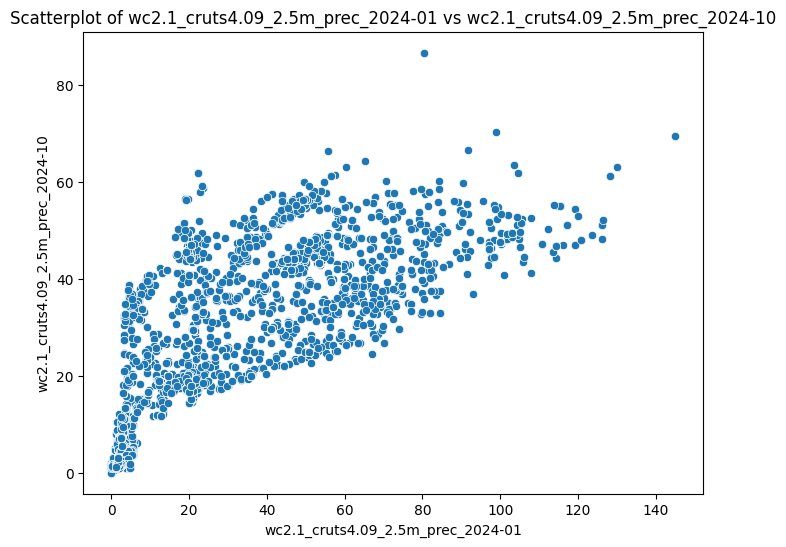

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.9590542898343709


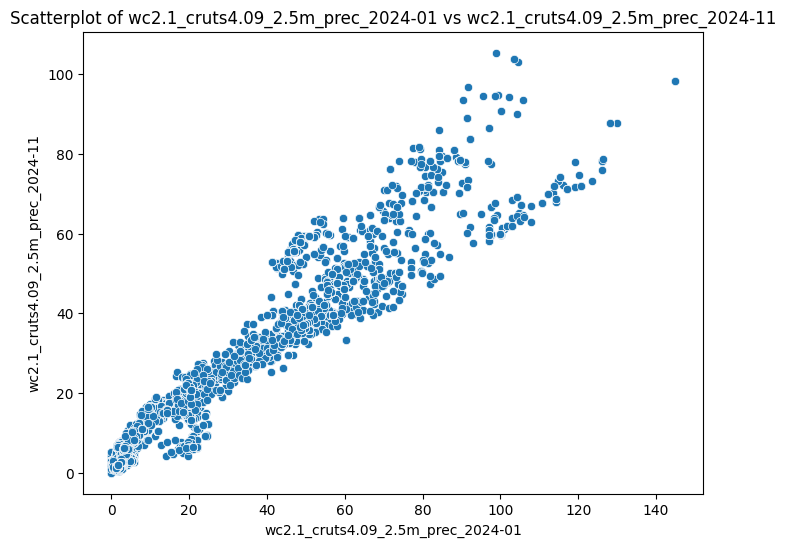

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-01 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.9551299096230823


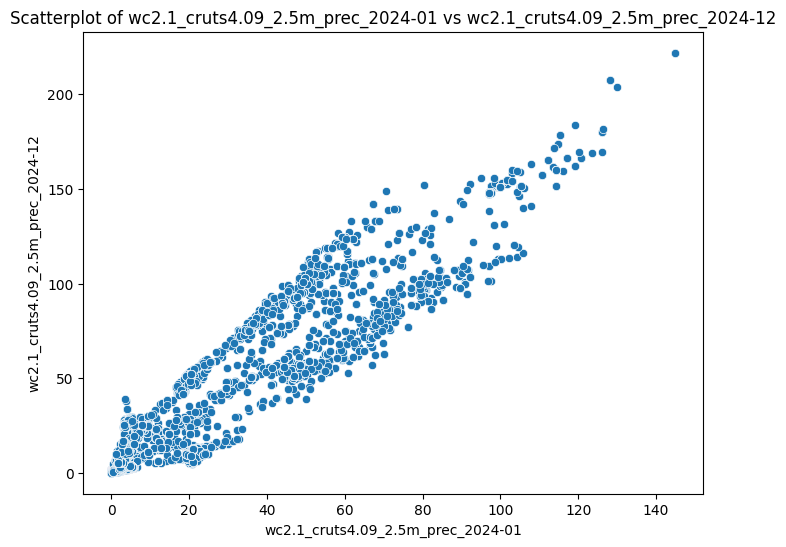

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-03: 0.8921915330926656


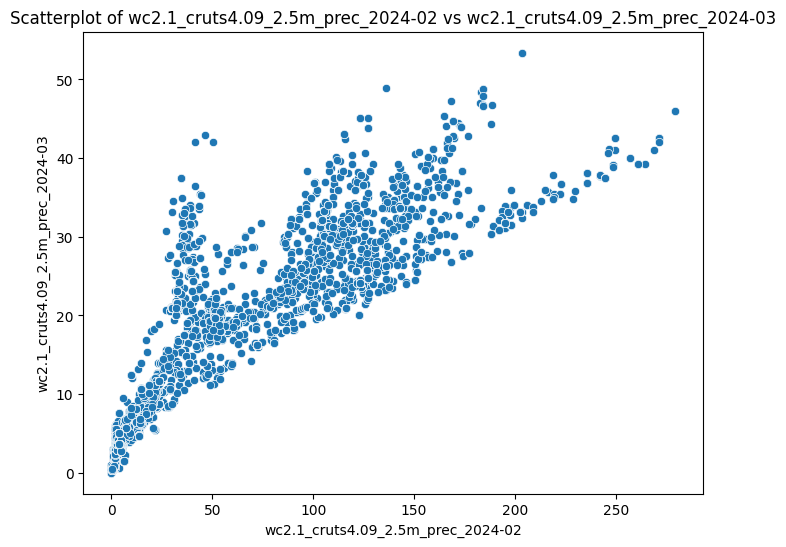

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-04: 0.877687914006102


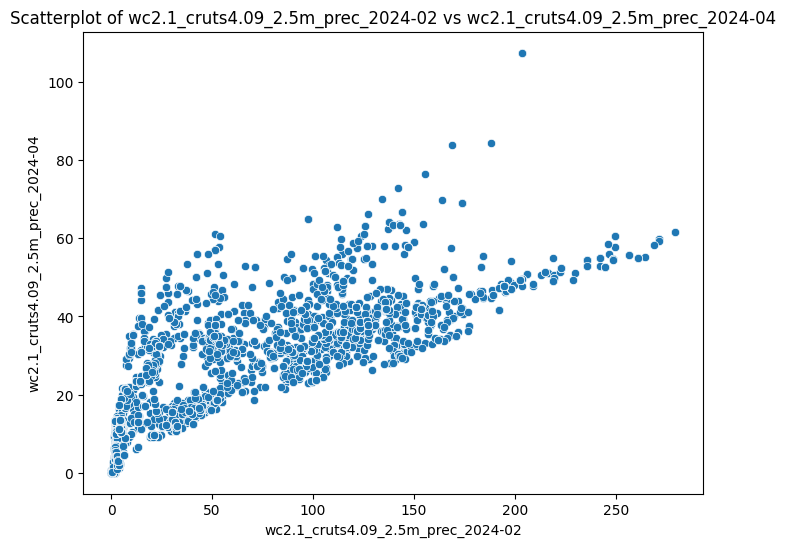

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-05: 0.8710968243993409


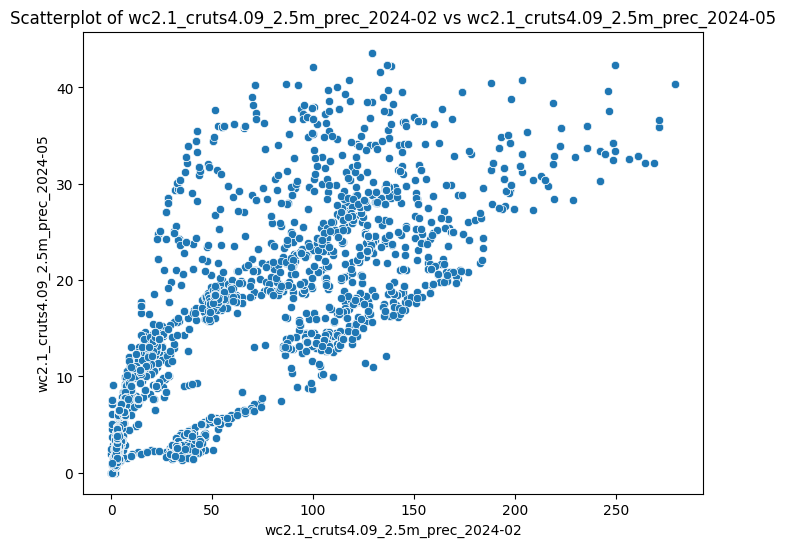

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-06: 0.7154270202150903


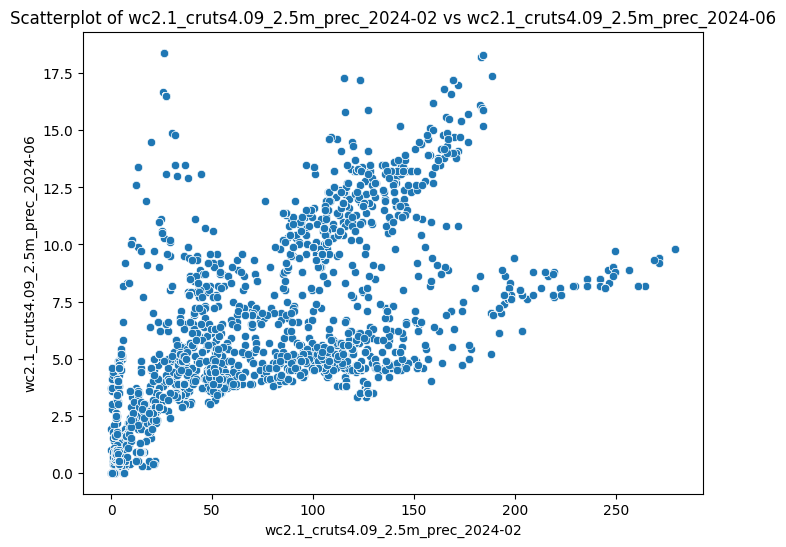

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-07: 0.3552527982622025


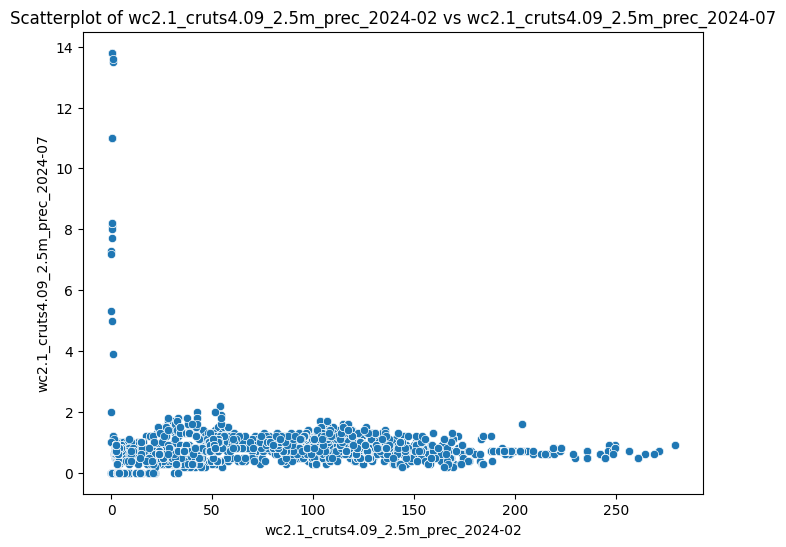

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-08: 0.6847807208351115


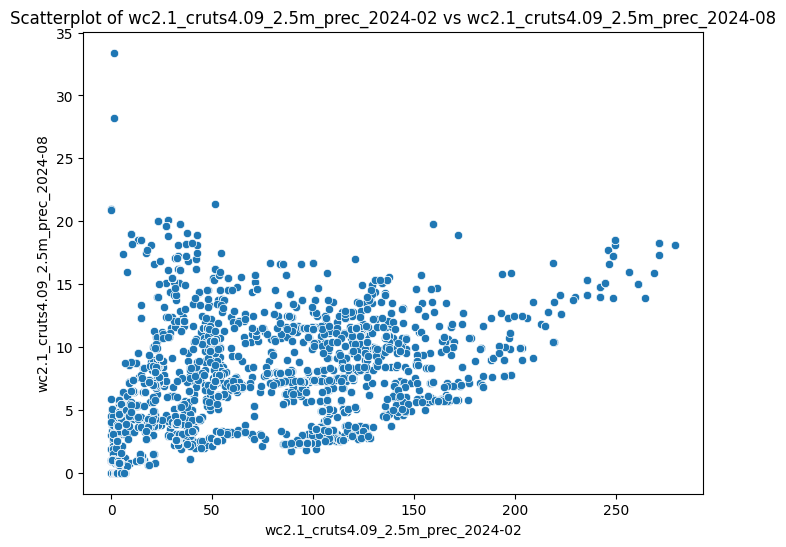

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-09: 0.736970895339634


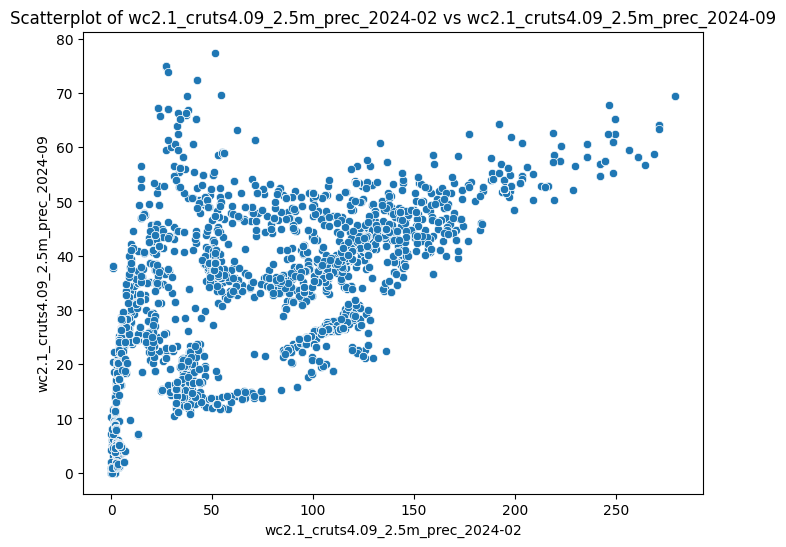

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-10: 0.9187985950148163


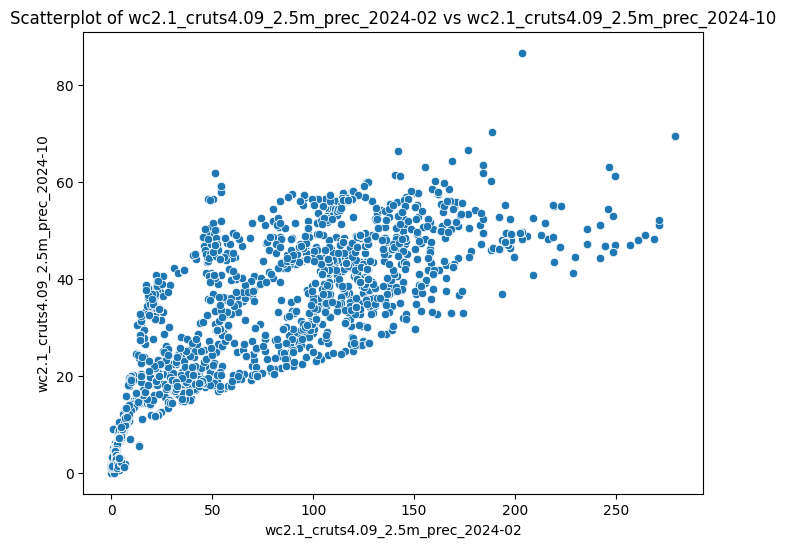

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.9670796167254054


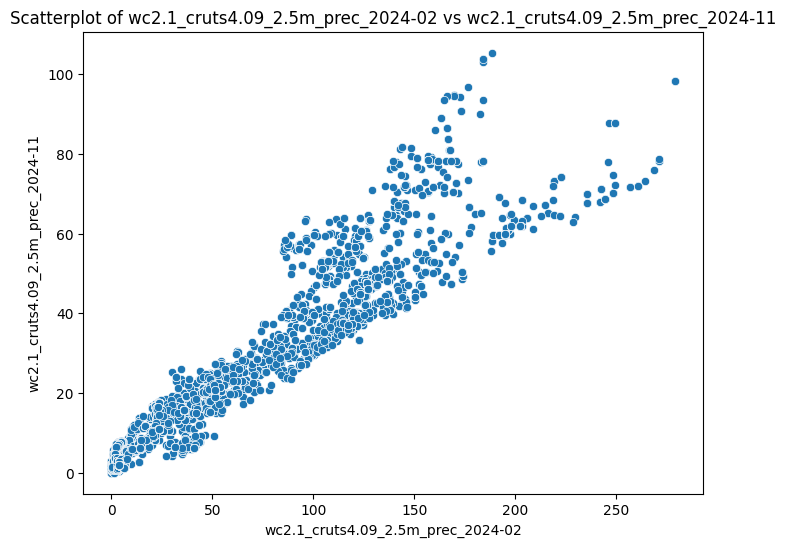

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-02 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.96792362771634


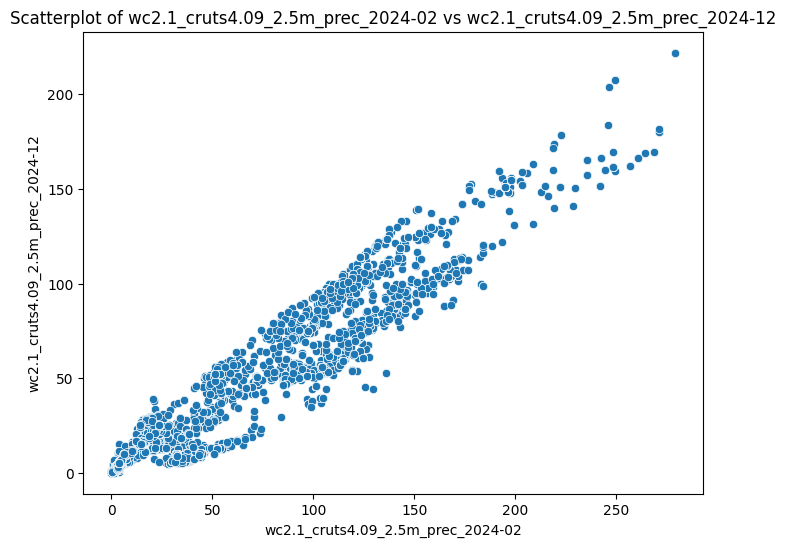

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-03 and wc2.1_cruts4.09_2.5m_prec_2024-04: 0.8102829439165865


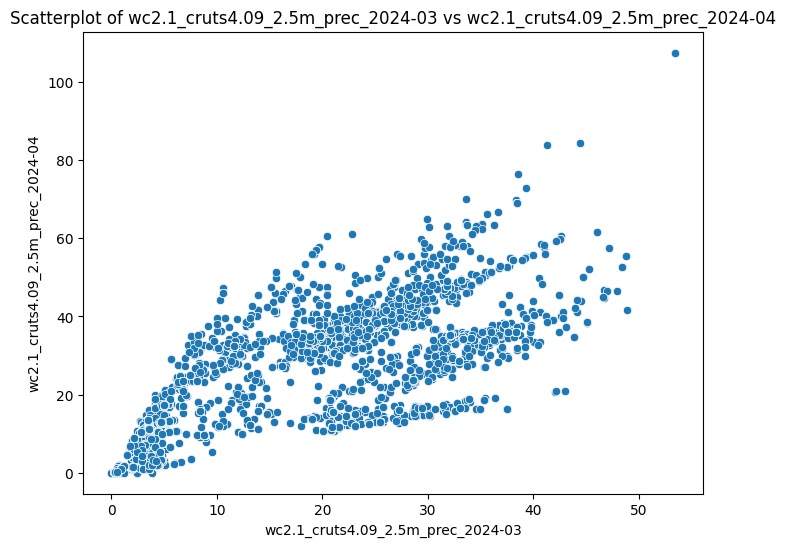

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-03 and wc2.1_cruts4.09_2.5m_prec_2024-05: 0.7303517869517168


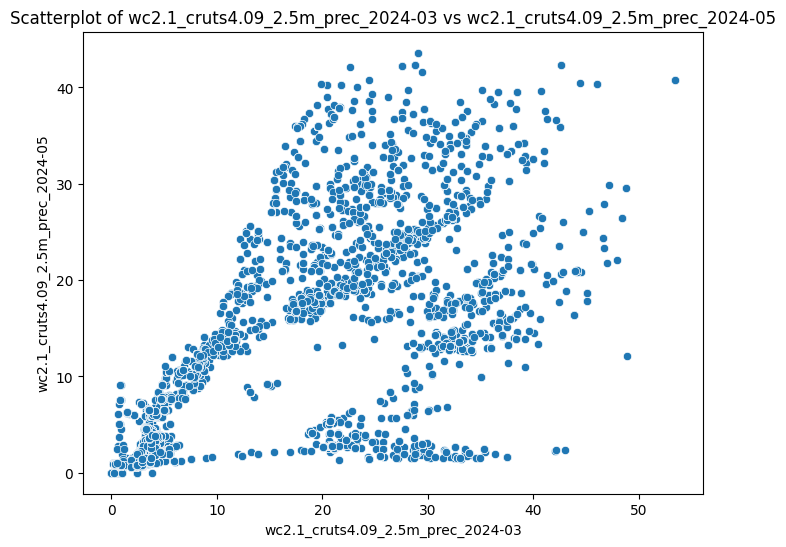

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-03 and wc2.1_cruts4.09_2.5m_prec_2024-06: 0.7598012604181058


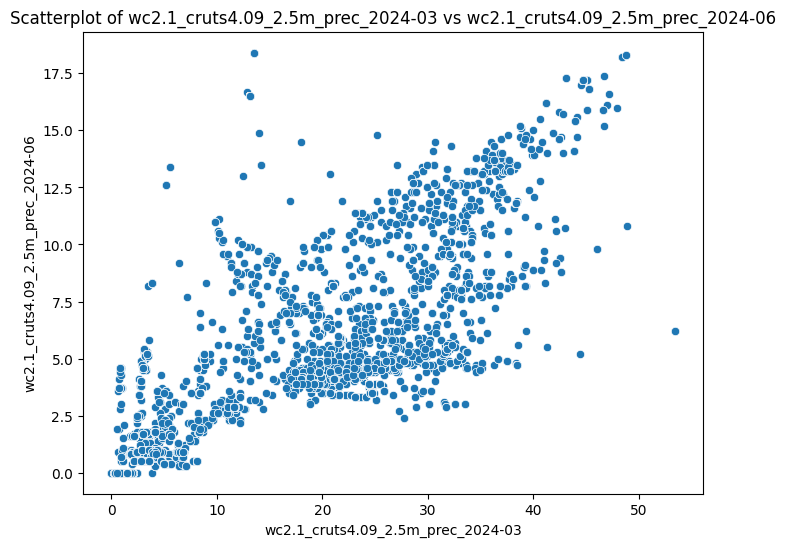

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-03 and wc2.1_cruts4.09_2.5m_prec_2024-07: 0.38949859453259733


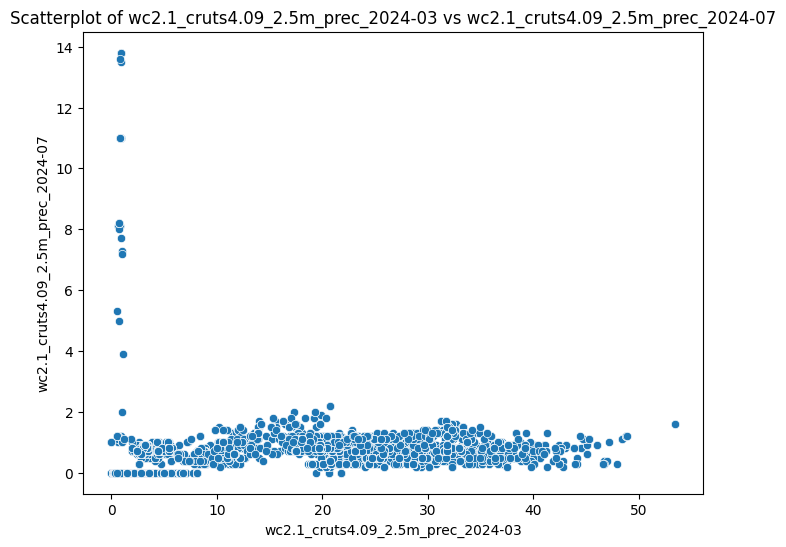

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-03 and wc2.1_cruts4.09_2.5m_prec_2024-08: 0.6454501865107978


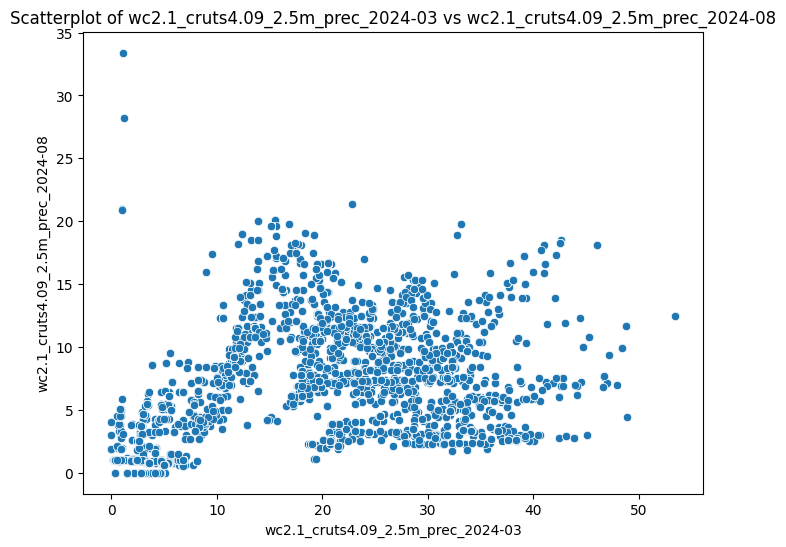

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-03 and wc2.1_cruts4.09_2.5m_prec_2024-09: 0.6635587505461176


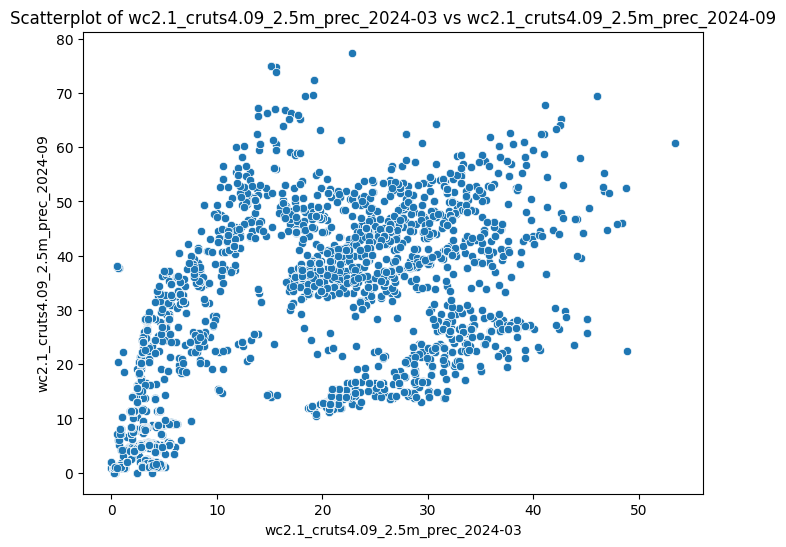

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-03 and wc2.1_cruts4.09_2.5m_prec_2024-10: 0.9095241269765674


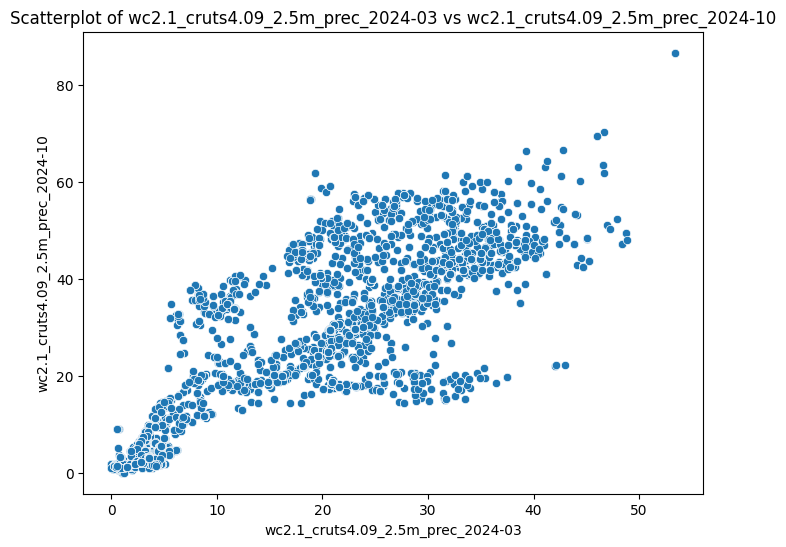

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-03 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.8891587670993996


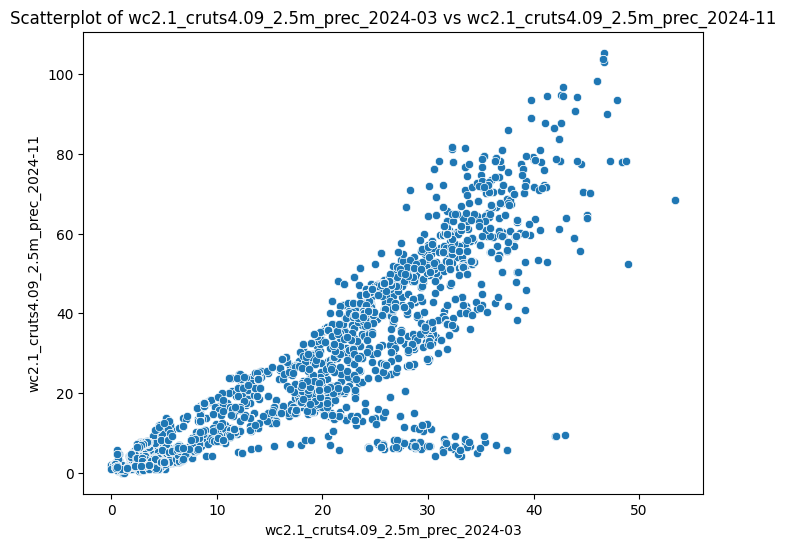

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-03 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.7808546501120126


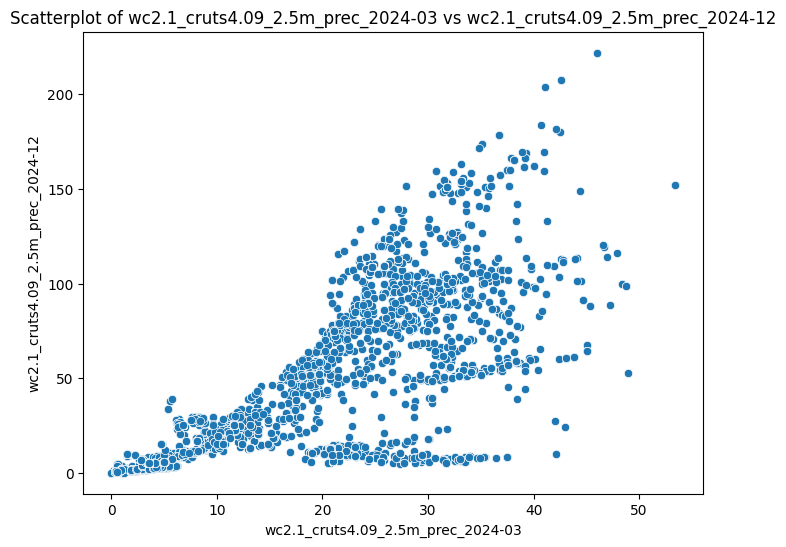

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-04 and wc2.1_cruts4.09_2.5m_prec_2024-05: 0.8926974502448645


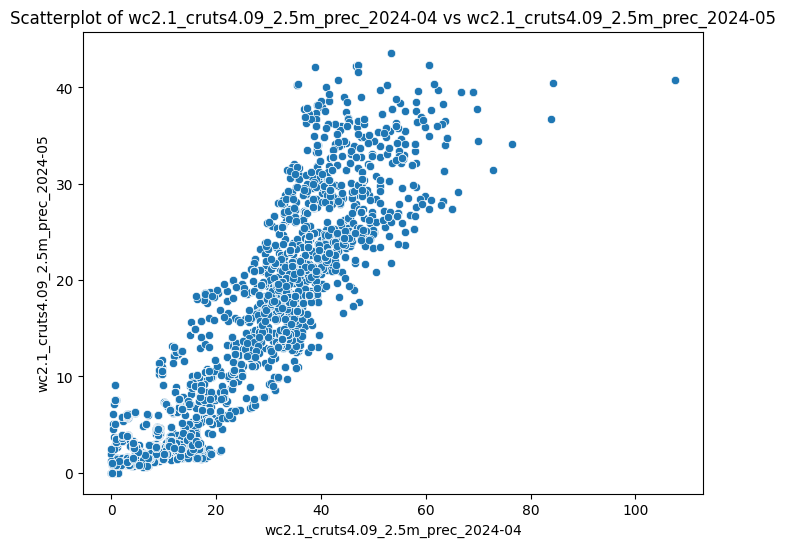

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-04 and wc2.1_cruts4.09_2.5m_prec_2024-06: 0.7109991251824688


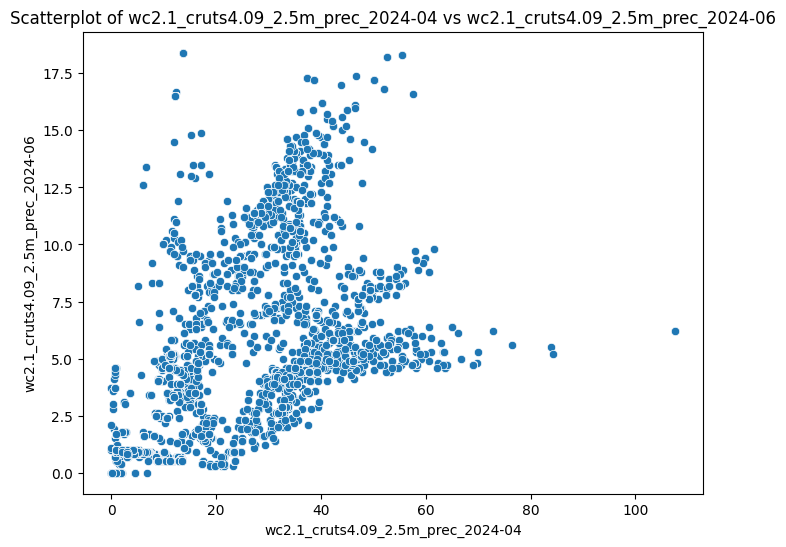

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-04 and wc2.1_cruts4.09_2.5m_prec_2024-07: 0.5218926345150261


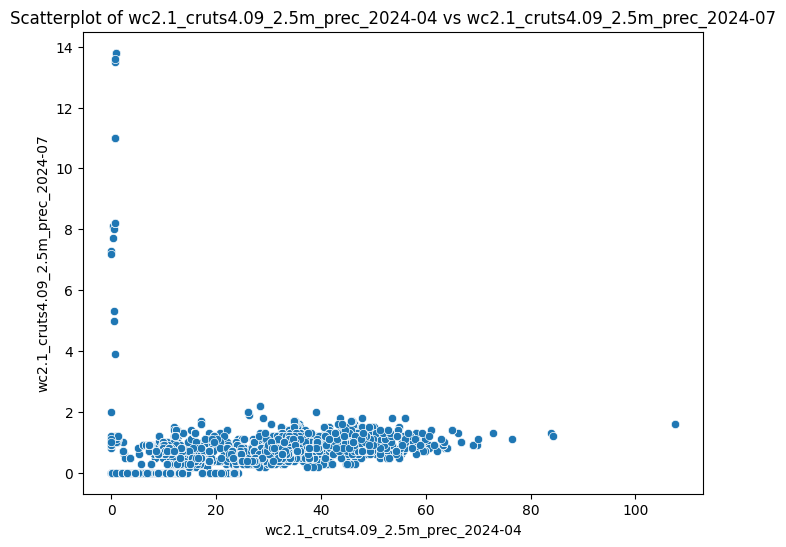

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-04 and wc2.1_cruts4.09_2.5m_prec_2024-08: 0.8314040678927809


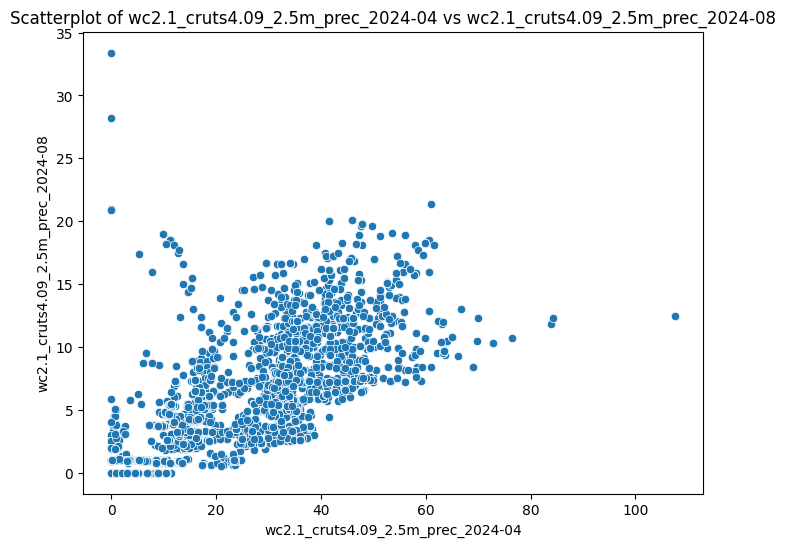

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-04 and wc2.1_cruts4.09_2.5m_prec_2024-09: 0.8981349648098496


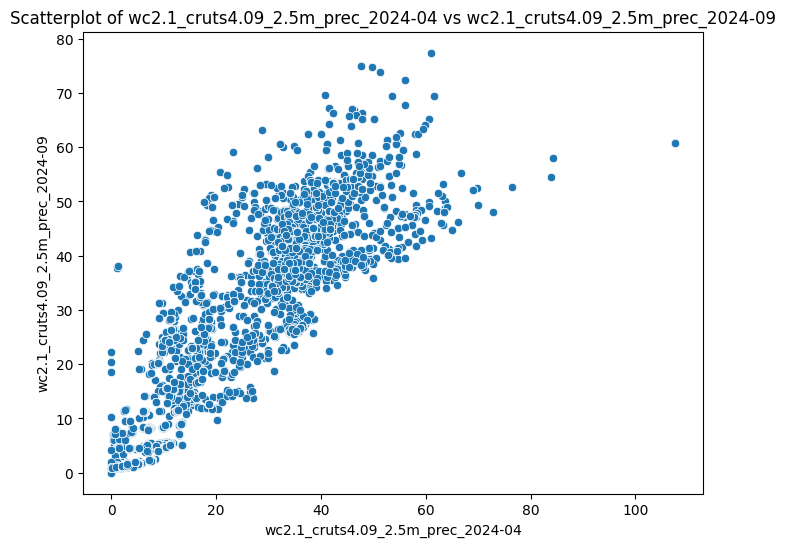

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-04 and wc2.1_cruts4.09_2.5m_prec_2024-10: 0.920767618487373


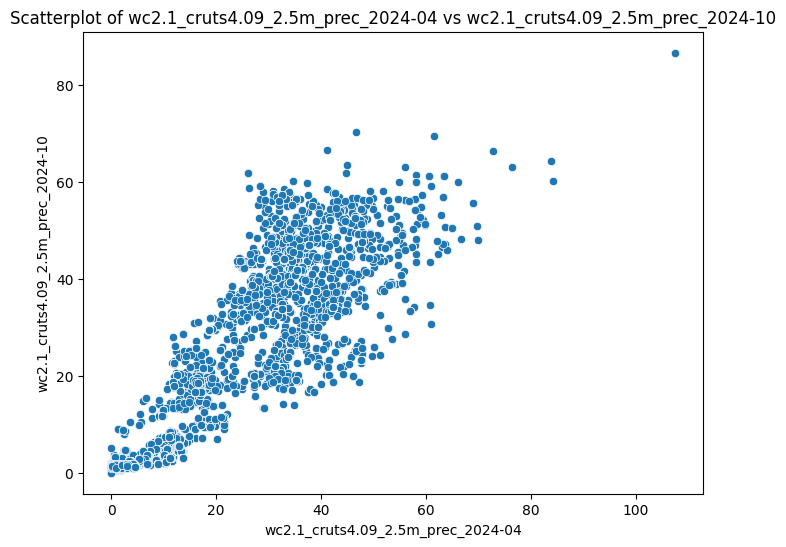

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-04 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.876969774880307


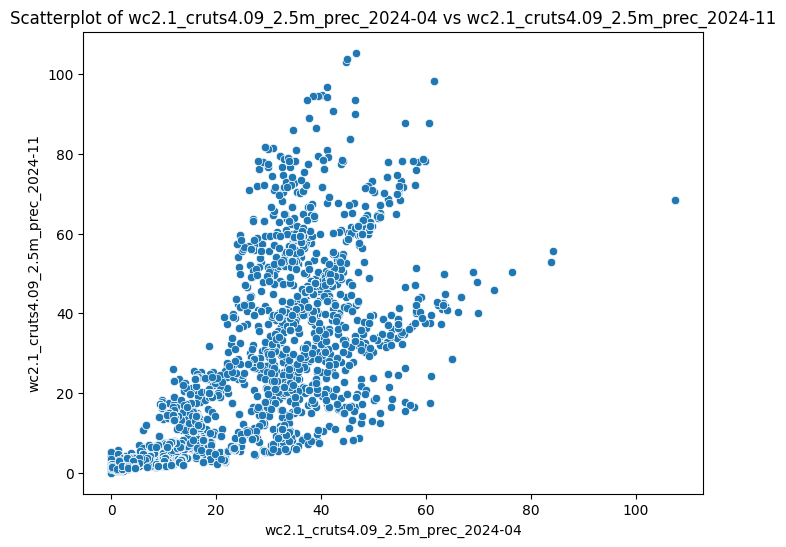

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-04 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.8701415913494304


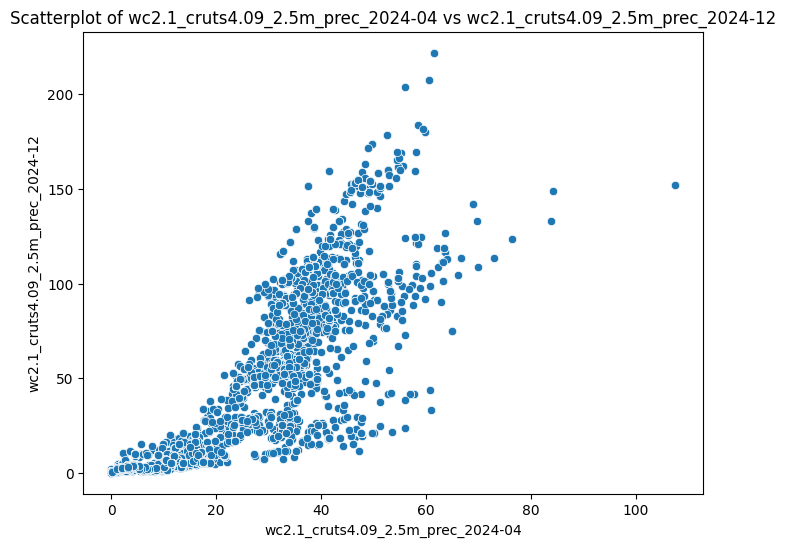

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-05 and wc2.1_cruts4.09_2.5m_prec_2024-06: 0.6406312665618493


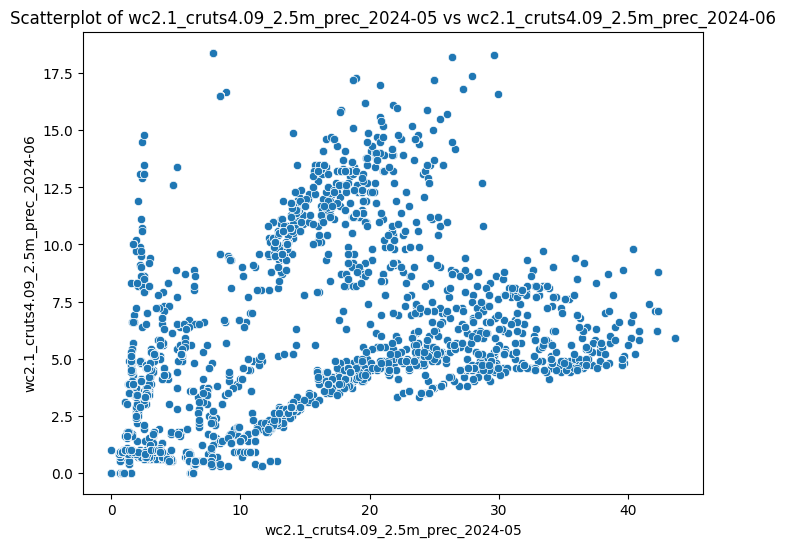

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-05 and wc2.1_cruts4.09_2.5m_prec_2024-07: 0.36420922660902283


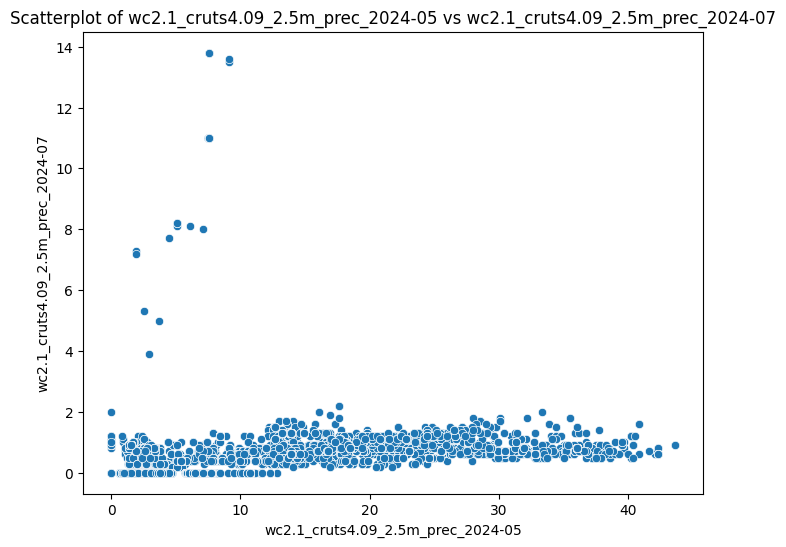

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-05 and wc2.1_cruts4.09_2.5m_prec_2024-08: 0.7988595268752147


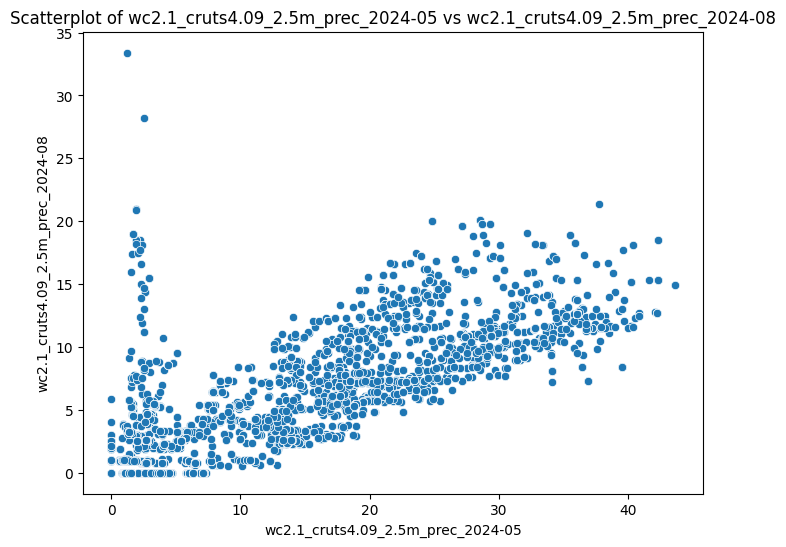

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-05 and wc2.1_cruts4.09_2.5m_prec_2024-09: 0.8171530923025468


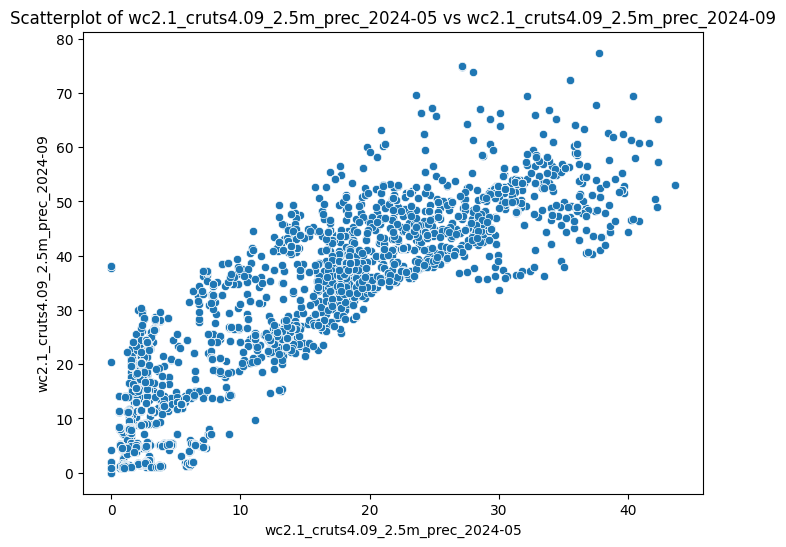

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-05 and wc2.1_cruts4.09_2.5m_prec_2024-10: 0.8322038626015907


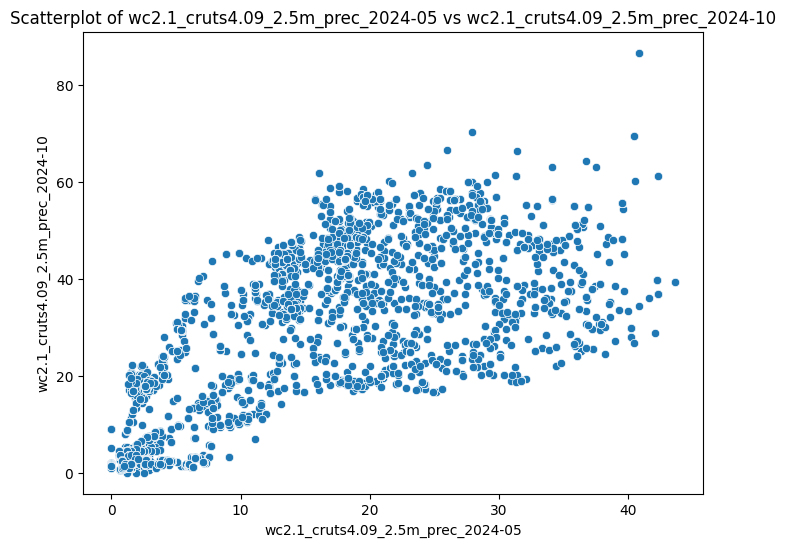

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-05 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.8281442179407472


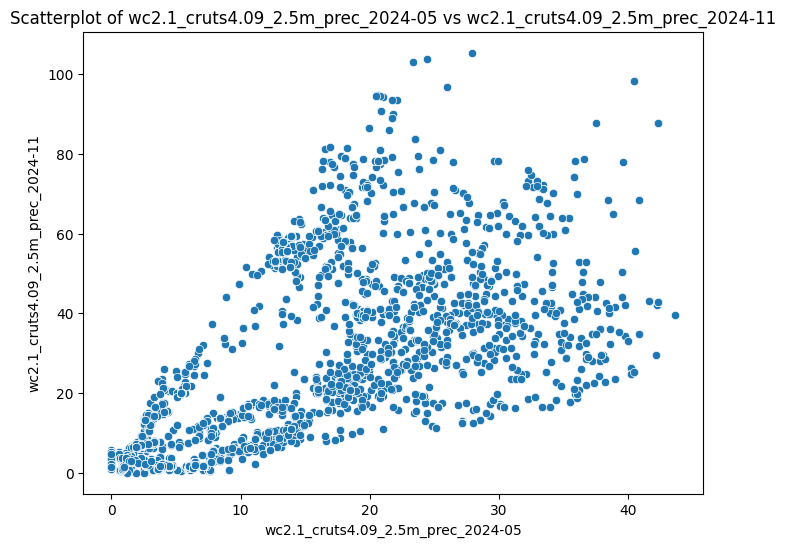

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-05 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.8956568257308378


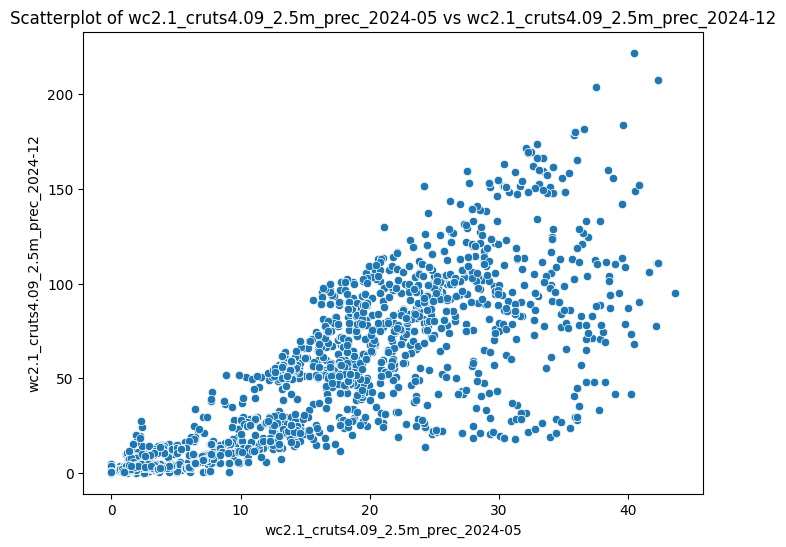

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-06 and wc2.1_cruts4.09_2.5m_prec_2024-07: 0.5208197153669952


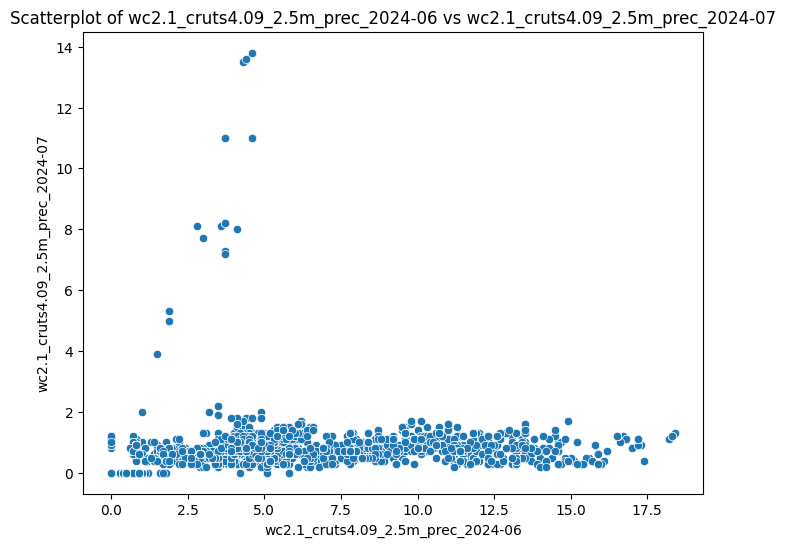

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-06 and wc2.1_cruts4.09_2.5m_prec_2024-08: 0.7289277071429426


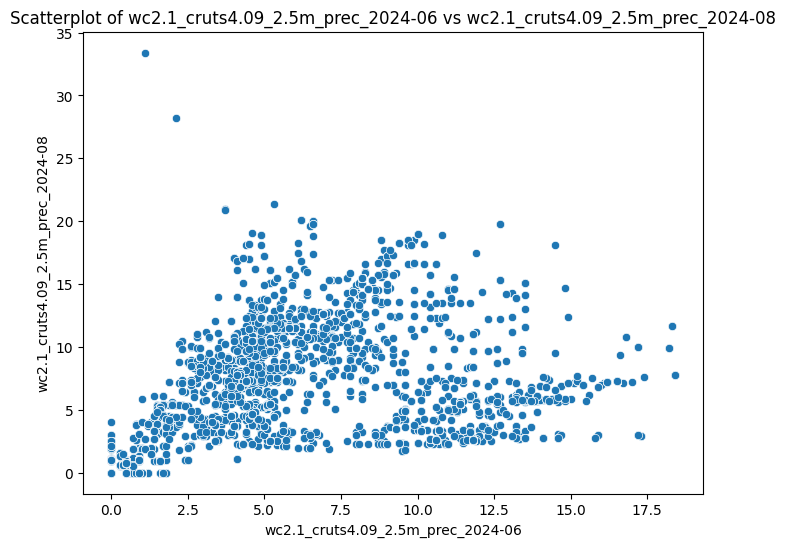

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-06 and wc2.1_cruts4.09_2.5m_prec_2024-09: 0.7607056231028109


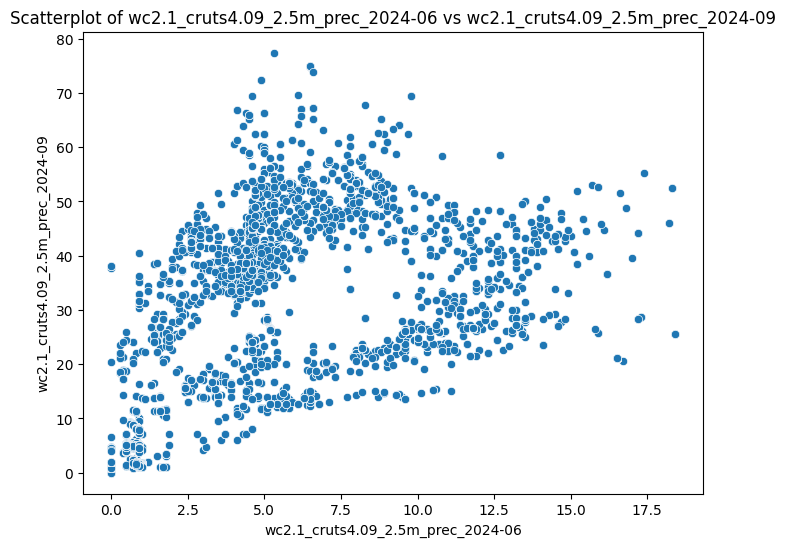

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-06 and wc2.1_cruts4.09_2.5m_prec_2024-10: 0.762696514416184


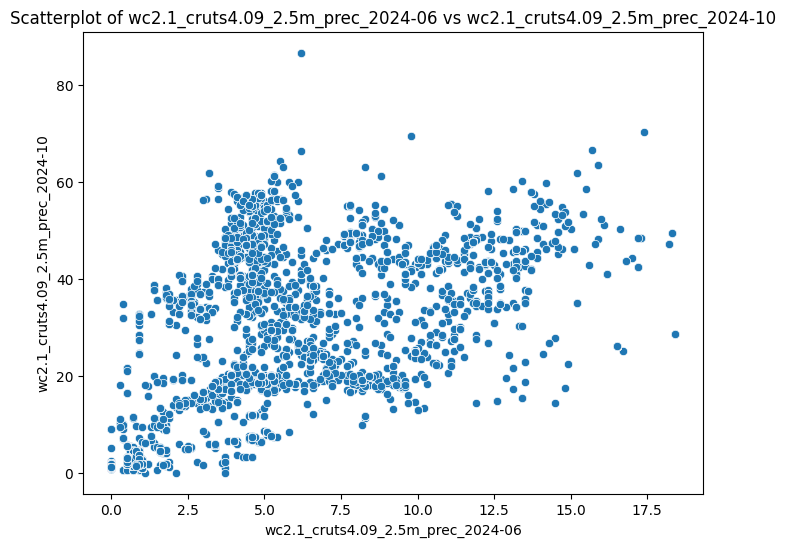

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-06 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.8002166242160321


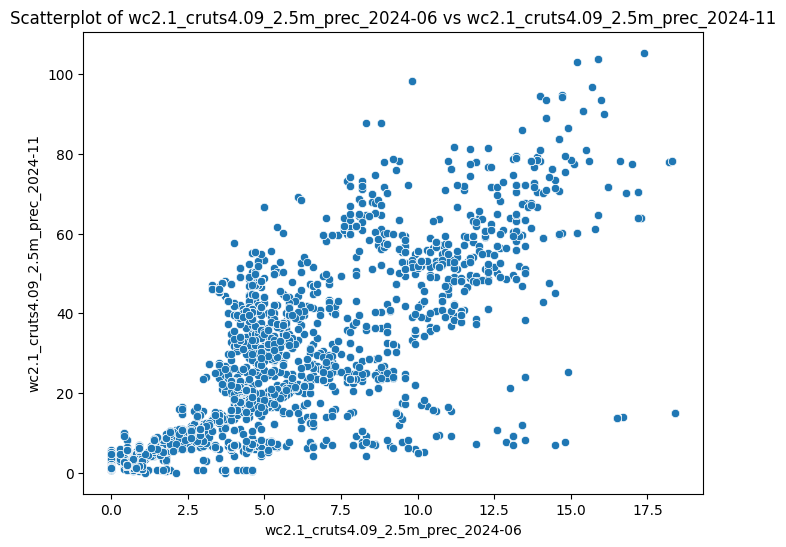

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-06 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.6035833612562842


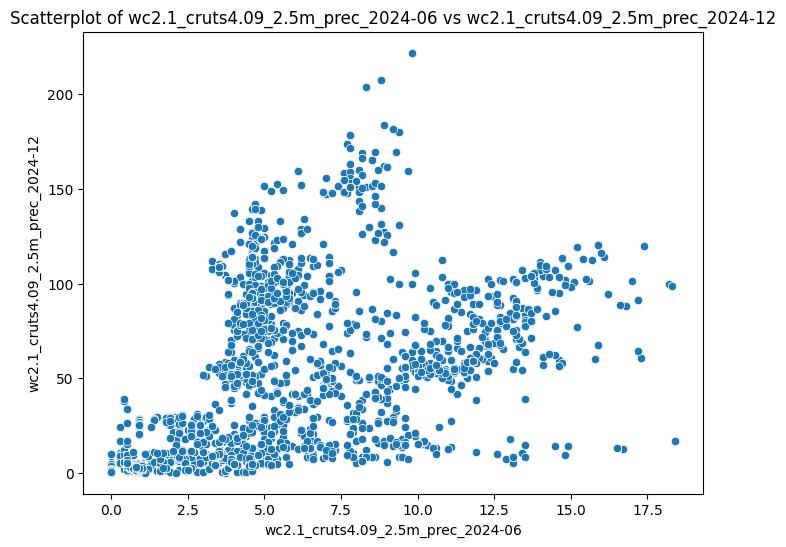

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-07 and wc2.1_cruts4.09_2.5m_prec_2024-08: 0.554864700925801


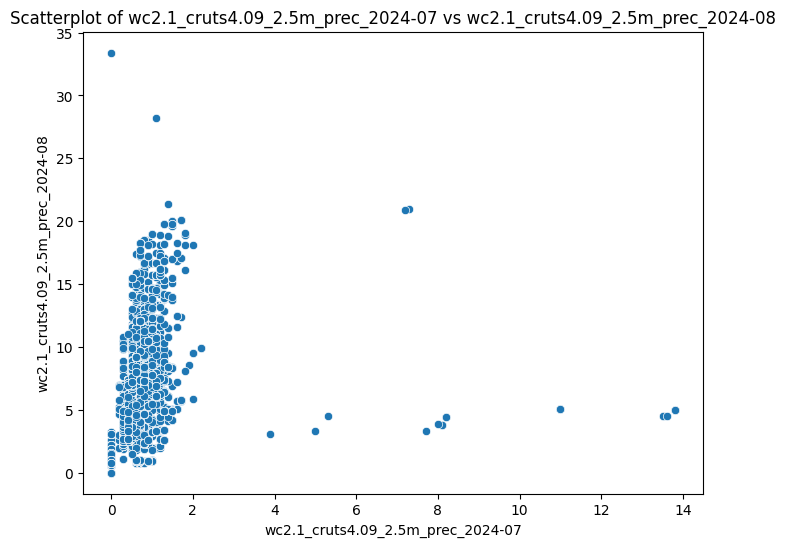

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-07 and wc2.1_cruts4.09_2.5m_prec_2024-09: 0.5992851685098265


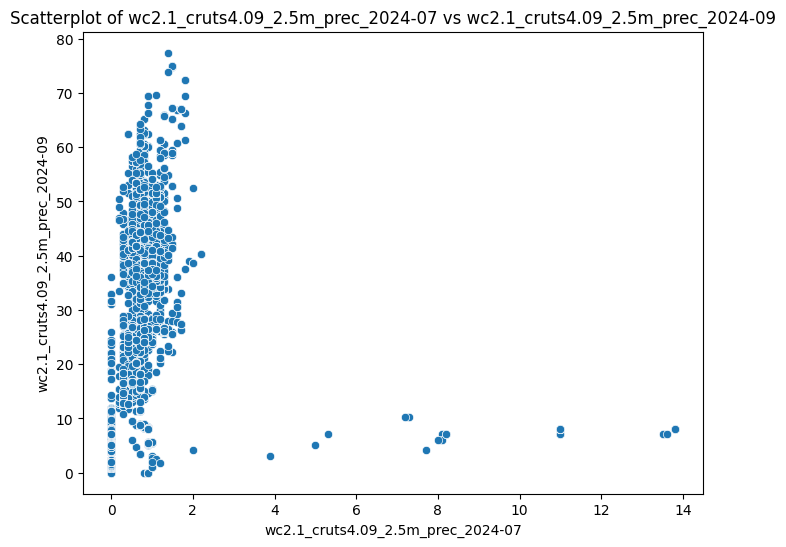

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-07 and wc2.1_cruts4.09_2.5m_prec_2024-10: 0.4801061227853431


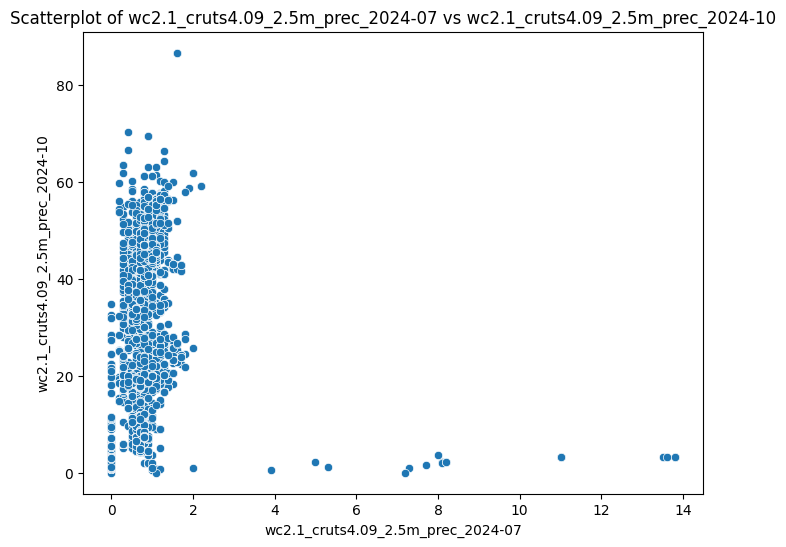

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-07 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.4288420852612126


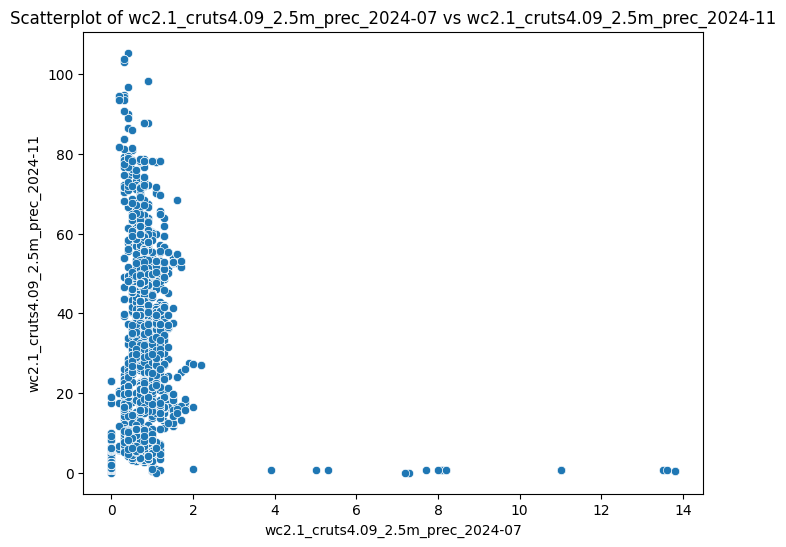

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-07 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.3216093731505232


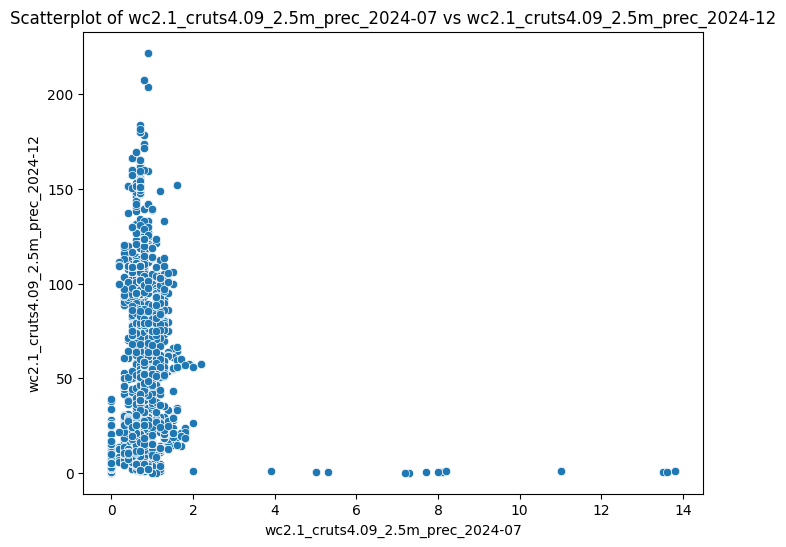

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-08 and wc2.1_cruts4.09_2.5m_prec_2024-09: 0.932080329248845


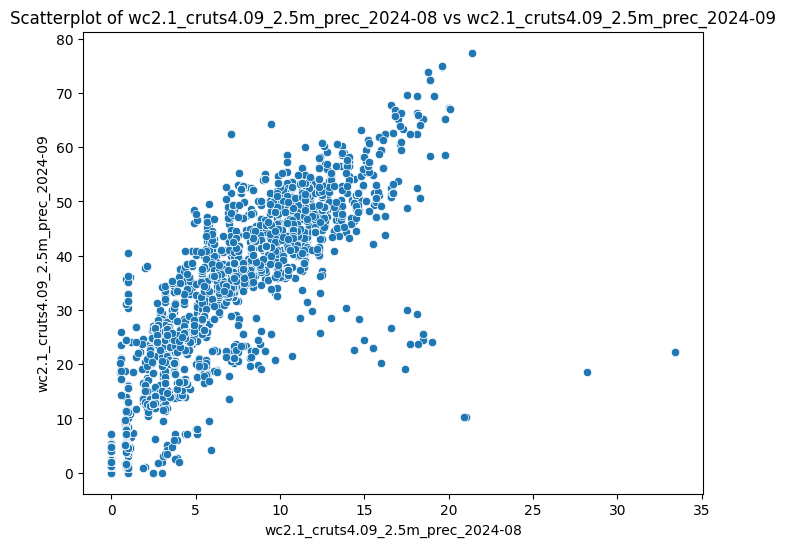

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-08 and wc2.1_cruts4.09_2.5m_prec_2024-10: 0.7563615050116654


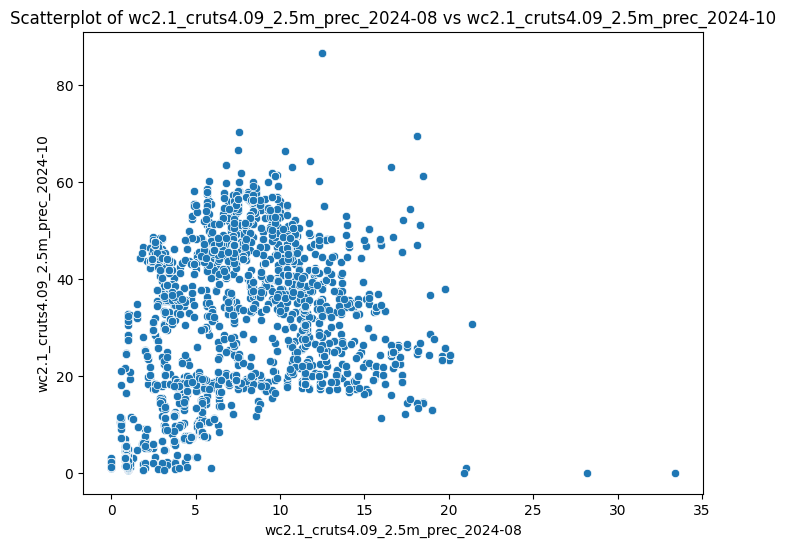

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-08 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.6912185128673876


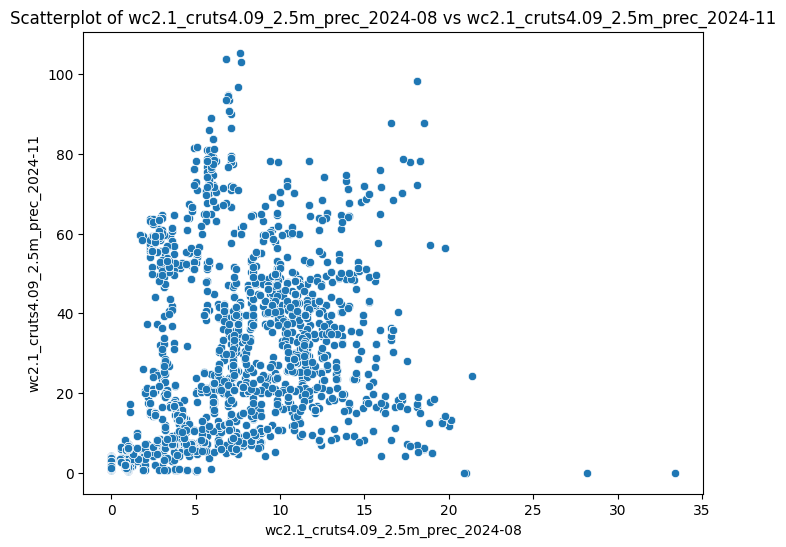

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-08 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.6811003465302351


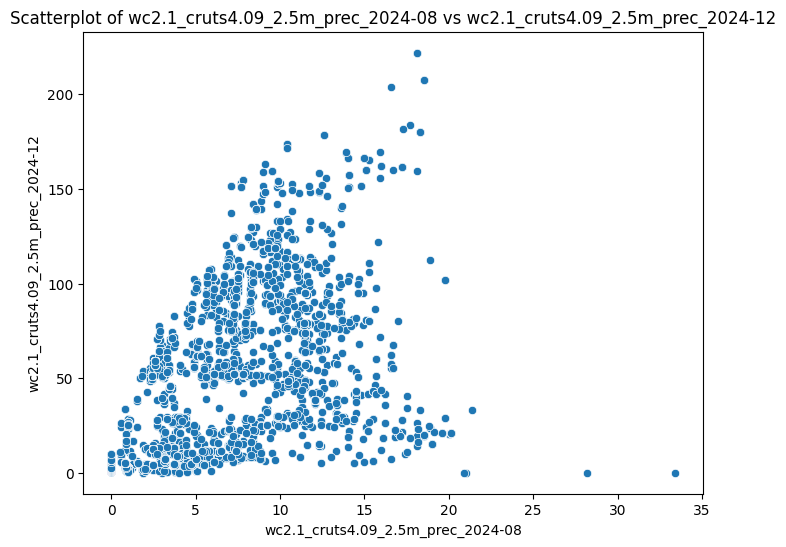

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-09 and wc2.1_cruts4.09_2.5m_prec_2024-10: 0.8202894087769519


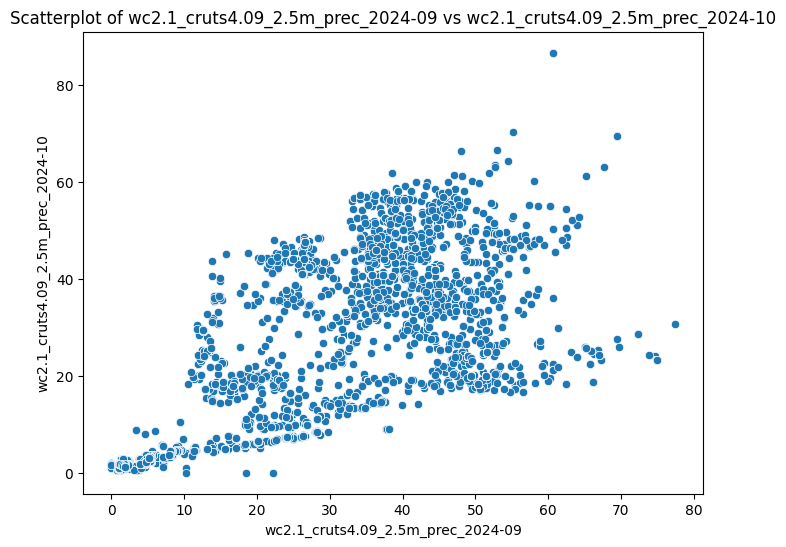

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-09 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.7700548488593517


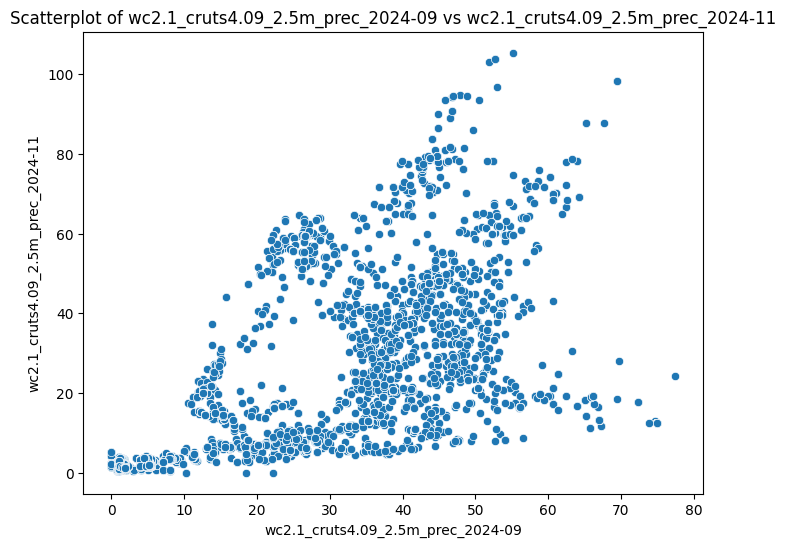

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-09 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.7372373310848879


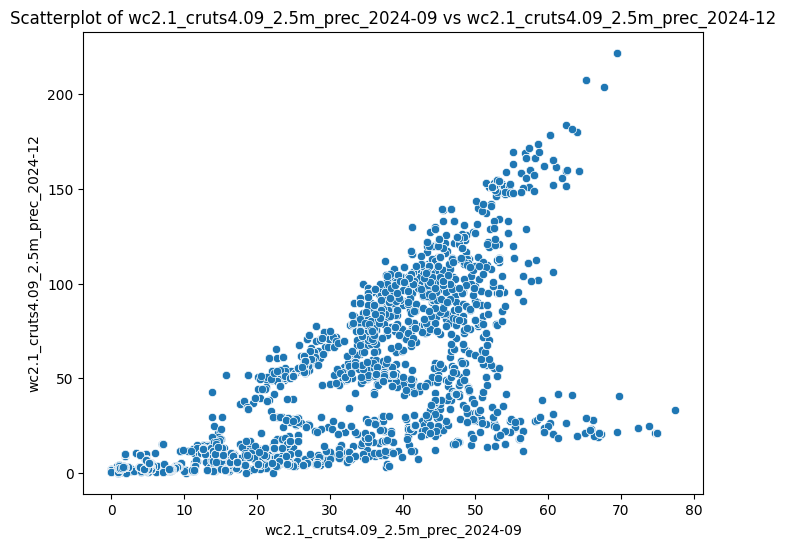

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-10 and wc2.1_cruts4.09_2.5m_prec_2024-11: 0.9342594129389371


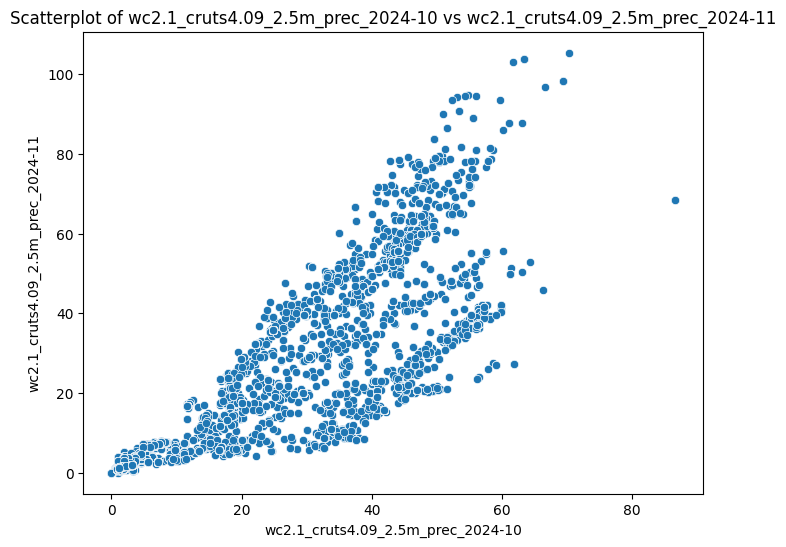

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-10 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.8794873531257719


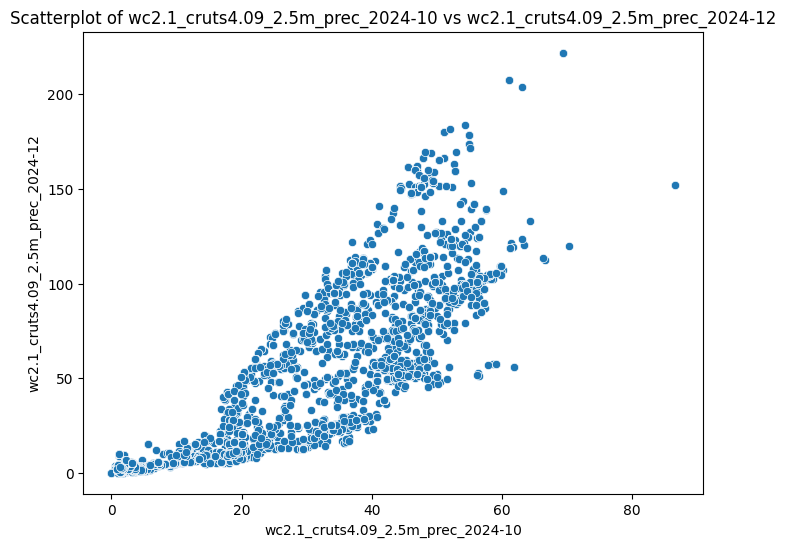

Correlation between wc2.1_cruts4.09_2.5m_prec_2024-11 and wc2.1_cruts4.09_2.5m_prec_2024-12: 0.9175167629572327


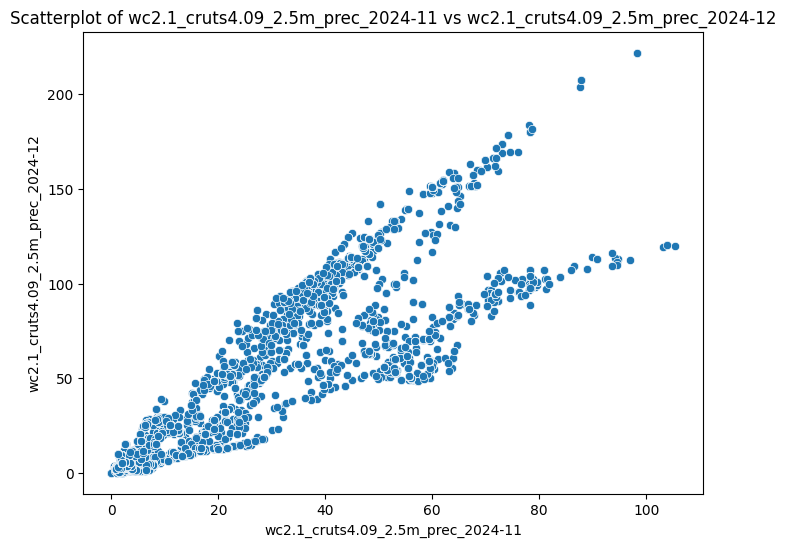

In [30]:
all_scatterplots(df)